In [2254]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Data: Uploading-Understanding-processing

In [2256]:
sales = pd.read_csv(r"D:\AI\Projects\Demand_Forecast\sales_master.csv")
product = pd.read_csv(r"D:\AI\Projects\Demand_Forecast\product_table.csv")

In [2257]:
sales.shape,product.shape

((46694, 5), (702, 7))

In [2258]:
sales.head()

date       variant  purchases  net_amount  gross_amount
0  2017-10-02  494340001004        1.0   19.282061         19.99
1  2017-10-02  236505002074        2.0   15.411960         15.98
2  2017-10-02  236505002092        1.0    7.603579          7.99
3  2017-10-02  434045002034        1.0   34.678851         34.99
4  2017-10-02  434045002036        4.0  132.961475        139.96

In [2259]:
sales["variant"][0]

494340001004

In [2260]:
product.head()

PRODUCT_CODE PRODUCT_TYPE_NAME  DEPARTMENT_ID         DEPARTMENT_NAME  \
0        526432       Pillow case            504  Sheets and pillowcases   
1        381038         Bed skirt            508    Bedspreads/bedskirts   
2        418545           T-shirt            176                  Basics   
3        467302           Storage            521            Textile kids   
4        452516             Socks            137                   Socks   

  INDEX_GROUP_NAME                    SECTION_NAME    article  
0             Home                           Sleep  526432001  
1             Home                           Sleep  381038009  
2         Menswear                   Men Underwear  418545028  
3             Home                            Kids  467302028  
4       Ladieswear  Women Nightwear, Socks & Tight  452516001

In [2261]:
# checking for null values in 'variant' column

sales['variant'].isnull().sum()  # no null values

0

In [2262]:
sales.dtypes

date             object
variant           int64
purchases       float64
net_amount      float64
gross_amount    float64
dtype: object

In [2263]:
product.dtypes

PRODUCT_CODE          int64
PRODUCT_TYPE_NAME    object
DEPARTMENT_ID         int64
DEPARTMENT_NAME      object
INDEX_GROUP_NAME     object
SECTION_NAME         object
article               int64
dtype: object

In [2264]:
# splitting first 9 numbers of variant in different column


# converting to string to split characters
sales["variant"] = sales["variant"].astype('str')

# pulling out first 9 characters
sales["article_in_sales"] = sales['variant'].str[:9]

# converting back to original form

sales["variant"] = sales["variant"].astype('int64')
sales["article_in_sales"] = sales["article_in_sales"].astype('int64')


In [2265]:
sales

date       variant  purchases  net_amount  gross_amount  \
0      2017-10-02  494340001004        1.0   19.282061         19.99   
1      2017-10-02  236505002074        2.0   15.411960         15.98   
2      2017-10-02  236505002092        1.0    7.603579          7.99   
3      2017-10-02  434045002034        1.0   34.678851         34.99   
4      2017-10-02  434045002036        4.0  132.961475        139.96   
...           ...           ...        ...         ...           ...   
46689  2017-10-22  539723005005        0.0    0.000000          0.00   
46690  2017-10-22  539723005004        0.0         NaN           NaN   
46691  2017-10-22  426407003370        6.0   26.974206        107.94   
46692  2017-10-22  531337004092        3.0   19.941915         53.97   
46693  2017-10-22  454537001046       31.0  154.607447        929.69   

       article_in_sales  
0             494340001  
1             236505002  
2             236505002  
3             434045002  
4             434045002  
...                 ...  
46689         539723005  
46690         539723005  
46691         426407003  
46692         531337004  
46693         454537001  

[46694 rows x 6 columns]

In [2266]:
sales["article_in_sales"].value_counts()

article_in_sales
230027012    456
512870001    351
447401002    239
538689002    235
516508002    217
            ... 
492892010      7
518608001      7
497184012      7
496848013      6
541803001      5
Name: count, Length: 702, dtype: int64

In [2267]:
# renaming to the same name for merge operation

sales.rename({"article_in_sales":"article"},inplace = True,axis = 1)

In [2268]:
sales.columns

Index(['date', 'variant', 'purchases', 'net_amount', 'gross_amount',
       'article'],
      dtype='object')

In [2269]:
# creating our main data by joining both tables 

merged_data = pd.merge(sales, product, on='article', how='left')
merged_data.shape

(46694, 12)

In [2270]:
merged_data.head()

date       variant  purchases  net_amount  gross_amount    article  \
0  2017-10-02  494340001004        1.0   19.282061         19.99  494340001   
1  2017-10-02  236505002074        2.0   15.411960         15.98  236505002   
2  2017-10-02  236505002092        1.0    7.603579          7.99  236505002   
3  2017-10-02  434045002034        1.0   34.678851         34.99  434045002   
4  2017-10-02  434045002036        4.0  132.961475        139.96  434045002   

   PRODUCT_CODE PRODUCT_TYPE_NAME  DEPARTMENT_ID   DEPARTMENT_NAME  \
0        494340    Jumper/Sweater            176            Basics   
1        236505           T-shirt            198  Jersey Fancy Boy   
2        236505           T-shirt            198  Jersey Fancy Boy   
3        434045       Other dress             59             Dress   
4        434045       Other dress             59             Dress   

  INDEX_GROUP_NAME           SECTION_NAME  
0         Menswear          Men Underwear  
1    Baby/Children      Baby Boy / Basics  
2    Baby/Children      Baby Boy / Basics  
3       Ladieswear  Ladies Modern Classic  
4       Ladieswear  Ladies Modern Classic

In [2271]:
# Removing unnecessary features as per the requirements.
# To make the data more relevant and reduce complexity,
# It will keep only the features mentioned in the requirements document.

#merged_data.drop(["variant","PRODUCT_CODE","DEPARTMENT_ID","SECTION_NAME"],axis = 1,inplace = True)


# Based on the analysis, I concluded that I cannot remove the above columns.
# The same product name consists of multiple product IDs, and the same department name consists of multiple department IDs.

# Although I can proceed by removing these features, I will keep them for now to maintain data integrity.

# removing only two features

merged_data.drop(["variant","SECTION_NAME"],axis = 1,inplace = True)


In [2272]:
merged_data

date  purchases  net_amount  gross_amount    article  \
0      2017-10-02        1.0   19.282061         19.99  494340001   
1      2017-10-02        2.0   15.411960         15.98  236505002   
2      2017-10-02        1.0    7.603579          7.99  236505002   
3      2017-10-02        1.0   34.678851         34.99  434045002   
4      2017-10-02        4.0  132.961475        139.96  434045002   
...           ...        ...         ...           ...        ...   
46689  2017-10-22        0.0    0.000000          0.00  539723005   
46690  2017-10-22        0.0         NaN           NaN  539723005   
46691  2017-10-22        6.0   26.974206        107.94  426407003   
46692  2017-10-22        3.0   19.941915         53.97  531337004   
46693  2017-10-22       31.0  154.607447        929.69  454537001   

       PRODUCT_CODE PRODUCT_TYPE_NAME  DEPARTMENT_ID         DEPARTMENT_NAME  \
0            494340    Jumper/Sweater            176                  Basics   
1            236505           T-shirt            198        Jersey Fancy Boy   
2            236505           T-shirt            198        Jersey Fancy Boy   
3            434045       Other dress             59                   Dress   
4            434045       Other dress             59                   Dress   
...             ...               ...            ...                     ...   
46689        539723       Other dress             93                 Basic 1   
46690        539723       Other dress             93                 Basic 1   
46691        426407               Bra             70  Lingerie Programs Push   
46692        531337            Romper              7             Baby basics   
46693        454537       Other dress            111               Woven top   

      INDEX_GROUP_NAME  
0             Menswear  
1        Baby/Children  
2        Baby/Children  
3           Ladieswear  
4           Ladieswear  
...                ...  
46689          Divided  
46690          Divided  
46691       Ladieswear  
46692    Baby/Children  
46693       Ladieswear  

[46694 rows x 10 columns]

In [2273]:
# lets process data
# checking for duplicates

merged_data.duplicated(keep = False).sum()   

8252

In [2274]:
import numpy as np


## Calculating percentage of null values for each column

null_values = (merged_data.isnull().sum() / merged_data.isnull().count() * 100).round(2)
null_values

date                 0.00
purchases            0.00
net_amount           1.33
gross_amount         1.33
article              0.00
PRODUCT_CODE         0.00
PRODUCT_TYPE_NAME    0.00
DEPARTMENT_ID        0.00
DEPARTMENT_NAME      0.00
INDEX_GROUP_NAME     0.00
dtype: float64

In [2275]:
# lets fill these null values as percentage are too less

merged_data["net_amount"] = merged_data["net_amount"].fillna(merged_data["net_amount"].mean())
merged_data["gross_amount"] = merged_data["gross_amount"].fillna(merged_data["gross_amount"].mean())

merged_data.describe()

purchases    net_amount  gross_amount       article   PRODUCT_CODE  \
count  46694.000000  46694.000000  46694.000000  4.669400e+04   46694.000000   
mean       9.659871    107.603171    180.288298  4.630616e+08  463061.628967   
std       26.554330    274.635072    452.830742  8.020259e+07   80202.593532   
min        0.000000      0.000000      0.000000  1.077130e+08  107713.000000   
25%        1.000000     12.337563     19.990000  4.380700e+08  438070.000000   
50%        3.000000     38.891198     59.980000  4.813050e+08  481305.000000   
75%        9.000000    107.603171    179.970000  5.157300e+08  515730.000000   
max     1535.000000  20457.456155  30684.650000  5.980310e+08  598031.000000   

       DEPARTMENT_ID  
count    46694.00000  
mean       300.25695  
std        268.08381  
min          7.00000  
25%         98.00000  
50%        195.00000  
75%        464.00000  
max       1323.00000

In [2276]:
merged_data.head()

date  purchases  net_amount  gross_amount    article  PRODUCT_CODE  \
0  2017-10-02        1.0   19.282061         19.99  494340001        494340   
1  2017-10-02        2.0   15.411960         15.98  236505002        236505   
2  2017-10-02        1.0    7.603579          7.99  236505002        236505   
3  2017-10-02        1.0   34.678851         34.99  434045002        434045   
4  2017-10-02        4.0  132.961475        139.96  434045002        434045   

  PRODUCT_TYPE_NAME  DEPARTMENT_ID   DEPARTMENT_NAME INDEX_GROUP_NAME  
0    Jumper/Sweater            176            Basics         Menswear  
1           T-shirt            198  Jersey Fancy Boy    Baby/Children  
2           T-shirt            198  Jersey Fancy Boy    Baby/Children  
3       Other dress             59             Dress       Ladieswear  
4       Other dress             59             Dress       Ladieswear

In [2277]:
# Dividing data into week0,week1 and week2 as per dates so that to understand sales change after giving discounts

#Week 0 -Data with no discounts
#week 1- Data with discounts
#Week 2 -data with discounts

list1 = ["2017-10-02","2017-10-03","2017-10-04","2017-10-05","2017-10-06","2017-10-07","2017-10-08"]
list2 = ["2017-10-09","2017-10-10","2017-10-11","2017-10-12","2017-10-13","2017-10-14","2017-10-15"]
list3 = ["2017-10-16","2017-10-17","2017-10-18","2017-10-19","2017-10-20","2017-10-21","2017-10-22"]


merged_data["Week"] = merged_data["date"].apply(lambda x: "Week_0" if x in list1 else ("Week_1" if x in list2 else "Week_2"))
merged_data["Week"].value_counts()

Week
Week_1    17304
Week_2    17090
Week_0    12300
Name: count, dtype: int64

In [2278]:
# If the purchase quantity is 0, setting both net_amount and gross_amount to 0 as well.(Data analysis done on these columns)
# Despite of filling it with mean values 
# This will help to identify products that were not sold at all.


merged_data.loc[merged_data['purchases'] == 0, ['net_amount', 'gross_amount']] = 0


In [2279]:
merged_data.head()

date  purchases  net_amount  gross_amount    article  PRODUCT_CODE  \
0  2017-10-02        1.0   19.282061         19.99  494340001        494340   
1  2017-10-02        2.0   15.411960         15.98  236505002        236505   
2  2017-10-02        1.0    7.603579          7.99  236505002        236505   
3  2017-10-02        1.0   34.678851         34.99  434045002        434045   
4  2017-10-02        4.0  132.961475        139.96  434045002        434045   

  PRODUCT_TYPE_NAME  DEPARTMENT_ID   DEPARTMENT_NAME INDEX_GROUP_NAME    Week  
0    Jumper/Sweater            176            Basics         Menswear  Week_0  
1           T-shirt            198  Jersey Fancy Boy    Baby/Children  Week_0  
2           T-shirt            198  Jersey Fancy Boy    Baby/Children  Week_0  
3       Other dress             59             Dress       Ladieswear  Week_0  
4       Other dress             59             Dress       Ladieswear  Week_0

In [2280]:
merged_data.rename({"purchases":"Sale_Quantity","net_amount":"Sale_amount"},axis = 1, inplace = True)

# Exploratory Data Analysis

In [2282]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Week vs Sale_Quantity

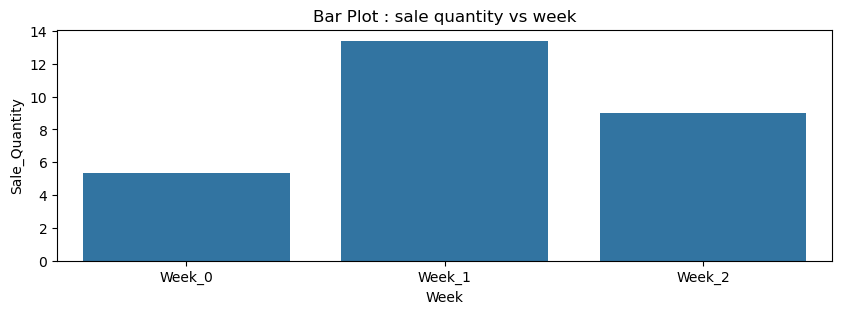

Week       sum
0  Week_0   65474.0
1  Week_1  232173.0
2  Week_2  153411.0

In [2284]:
# Bar and tabular data 

plt.figure(figsize=(10, 3))
sns.barplot(x='Week', y='Sale_Quantity', data=merged_data, ci=None)
plt.title('Bar Plot : sale quantity vs week')
plt.xlabel('Week')
plt.ylabel('Sale_Quantity')
plt.show()

grouped_data = merged_data.groupby('Week')['Sale_Quantity'].agg(['sum']).reset_index()
grouped_data

# week 1 and week 2 sales are much higher as compared to week 0 cause of discounts

#### Week vs Sale_amount vs gross_amount

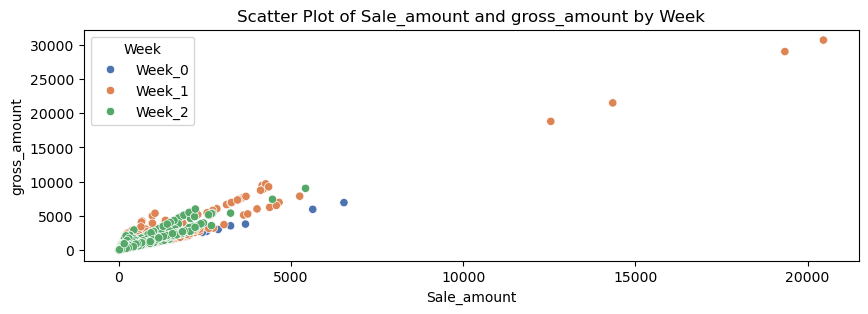

In [2286]:
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Sale_amount', y='gross_amount', hue='Week', data=merged_data, palette='deep')
plt.title('Scatter Plot of Sale_amount and gross_amount by Week')
plt.xlabel('Sale_amount')
plt.ylabel('gross_amount')
plt.legend(title='Week')
plt.show()

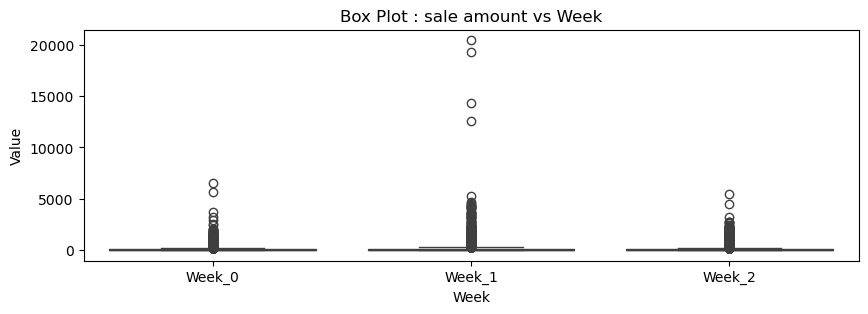

In [2287]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='Week', y='Sale_amount', data=merged_data)
plt.title('Box Plot : sale amount vs Week')
plt.xlabel('Week')
plt.ylabel('Value')
plt.show()

In [2288]:
#Based on the above two plots, it appears that the net amount is higher in Week 1. The underlying reason seems to be that people are 
# purchasing more items and opting for more expensive products due to discounts.

#### INDEX_GROUP_NAME vs Sale_Quantity vs Week


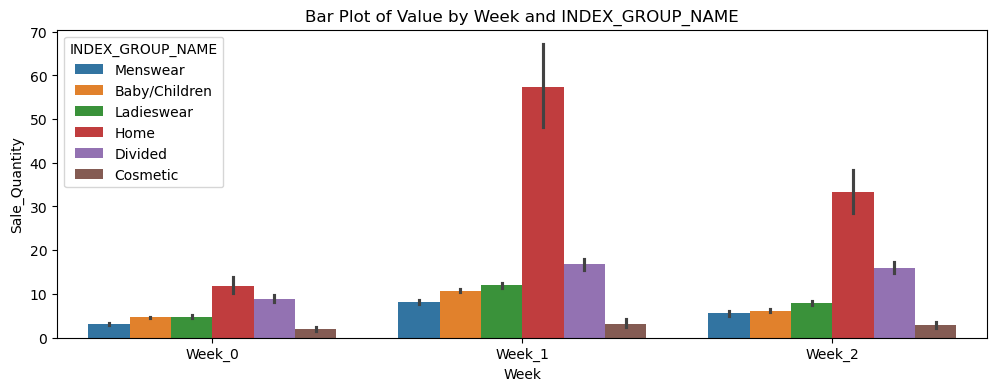

In [2290]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Week', y='Sale_Quantity', hue='INDEX_GROUP_NAME', data=merged_data)
plt.title('Bar Plot of Value by Week and INDEX_GROUP_NAME')
plt.xlabel('Week')
plt.ylabel('Sale_Quantity')
plt.legend(title='INDEX_GROUP_NAME')
plt.show()

In [2291]:
#It is clearly visible from the plot that sales in Week 1 and Week 2 are significantly higher than those 
# in Week 0. Additionally, the "Home" index group consistently shows the highest sales across all weeks.

#### DEPARTMENT_NAME vs Sale_Quantity


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


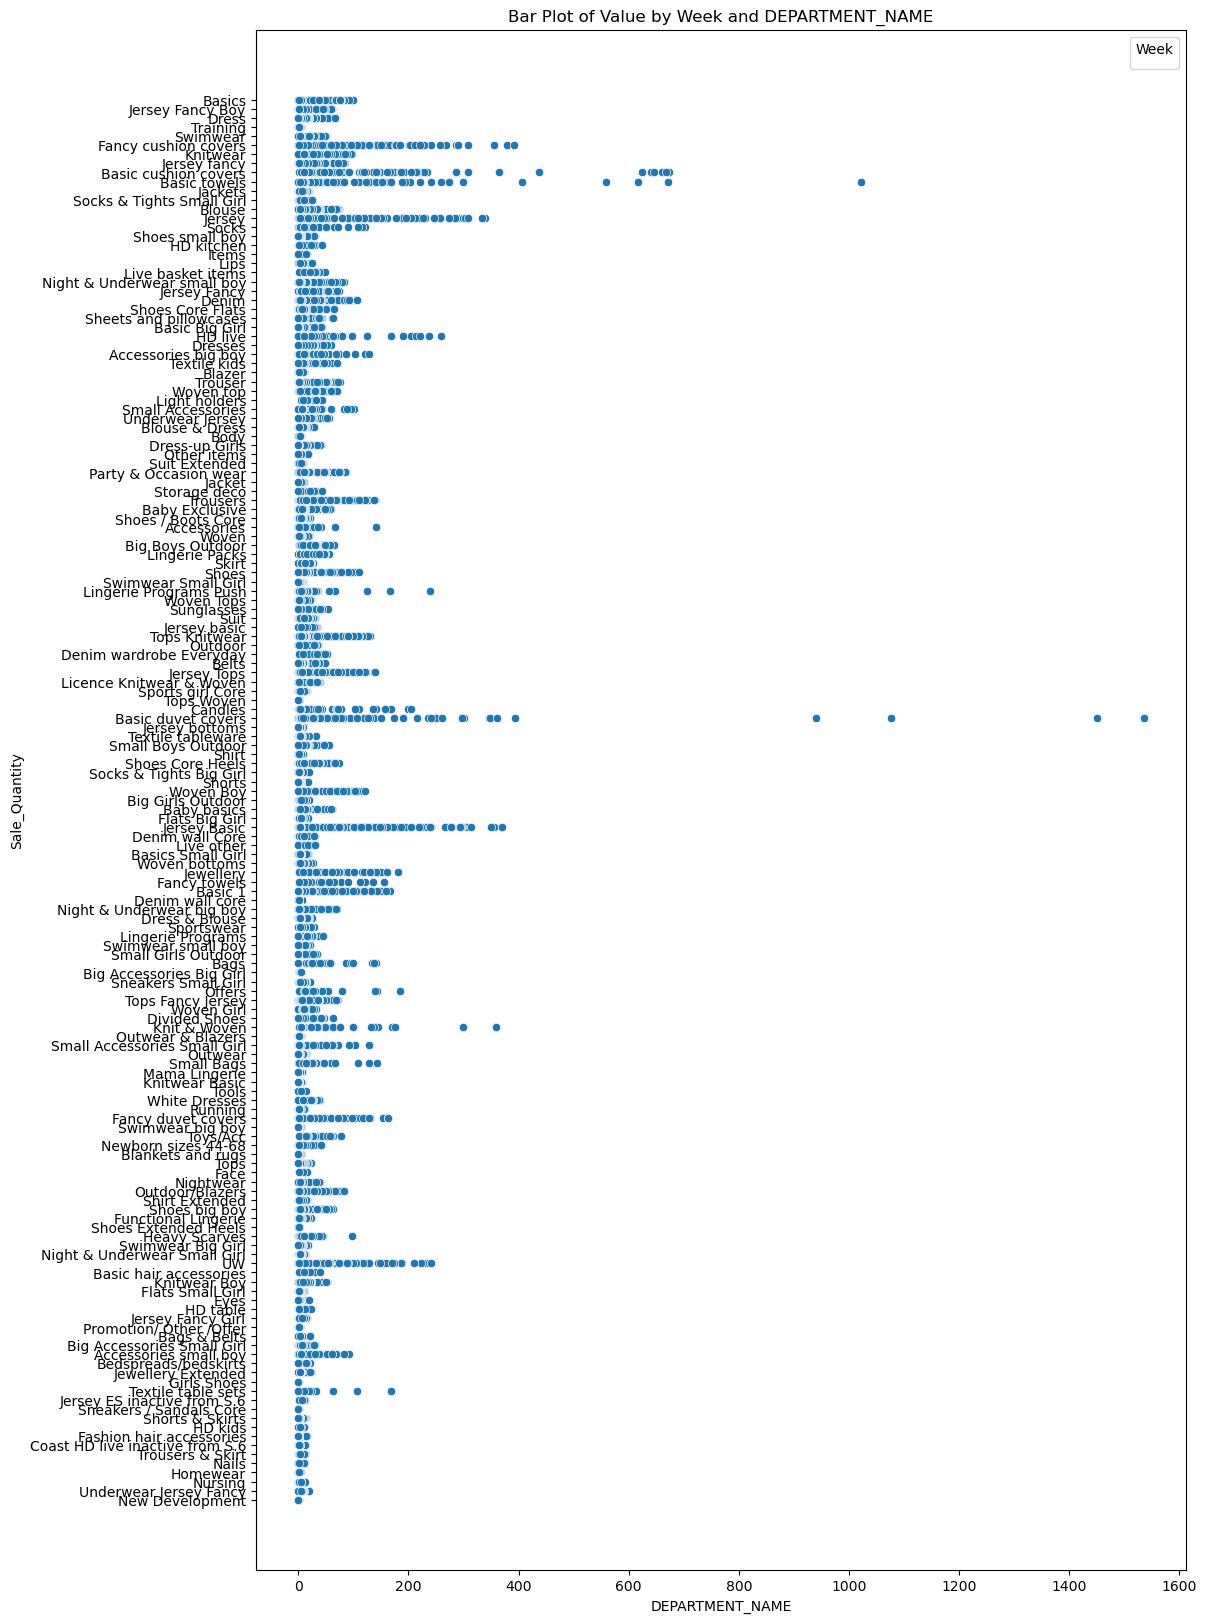

In [2293]:
plt.figure(figsize=(12, 20))
sns.scatterplot(x='Sale_Quantity', y='DEPARTMENT_NAME', data=merged_data)
plt.title('Bar Plot of Value by Week and DEPARTMENT_NAME')
plt.xlabel('DEPARTMENT_NAME')
plt.ylabel('Sale_Quantity')
plt.legend(title='Week')
plt.show()

In [2294]:
grouped_data = merged_data.groupby('DEPARTMENT_NAME')['Sale_Quantity'].agg(['sum']).reset_index()
grouped_data.sort_values(["sum"],ascending=False)

DEPARTMENT_NAME      sum
57                      Jersey Basic  33532.0
56                            Jersey  20480.0
39              Fancy cushion covers  18105.0
127                         Swimwear  16519.0
142                          Trouser  16357.0
..                               ...      ...
17          Big Accessories Big Girl     27.0
27   Coast HD live inactive from S.6     23.0
82                   New Development     14.0
116          Sneakers / Sandals Core      5.0
46                       Girls Shoes      1.0

[155 rows x 2 columns]

In [2295]:
# Its clearly visible that the sale of "Swimwear" is much more than other in all weeks.

#### PRODUCT_TYPE_NAME vs Sale_Quantity


In [2297]:
grouped_data = merged_data.groupby('PRODUCT_TYPE_NAME')['Sale_Quantity'].agg(['sum']).reset_index()
grouped_data.sort_values(["sum"],ascending=False)

PRODUCT_TYPE_NAME      sum
79          Trousers  56248.0
33    Jumper/Sweater  54882.0
20     Cushion cover  32611.0
72           T-shirt  27806.0
41       Other dress  24248.0
..               ...      ...
54            Romper     59.0
77              Toys     48.0
53              Robe     35.0
3          Bed skirt     24.0
36      Morning gown     13.0

[83 rows x 2 columns]

In [2298]:
# Its clearly visible that the sale of "Trousers" is much more than other in all weeks.

#### PRODUCT_TYPE_NAME vs Sale_amount


In [2300]:
grouped_data = merged_data.groupby('PRODUCT_TYPE_NAME')['Sale_amount'].agg(['sum']).reset_index()
grouped_data.sort_values(["sum"],ascending=False)

PRODUCT_TYPE_NAME            sum
79          Trousers  703218.182687
33    Jumper/Sweater  617833.474065
41       Other dress  300736.372421
2          Bed linen  239906.732969
44         Other top  223345.853807
..               ...            ...
15   Chem. cosmetics     341.510784
29   Hair/alice band     287.491122
30           Hangers     252.770755
37            Napkin     234.699593
36      Morning gown      57.058535

[83 rows x 2 columns]

# Weekely Trends (Just for experiment)

In [2302]:
merged_data.head()

date  Sale_Quantity  Sale_amount  gross_amount    article  \
0  2017-10-02            1.0    19.282061         19.99  494340001   
1  2017-10-02            2.0    15.411960         15.98  236505002   
2  2017-10-02            1.0     7.603579          7.99  236505002   
3  2017-10-02            1.0    34.678851         34.99  434045002   
4  2017-10-02            4.0   132.961475        139.96  434045002   

   PRODUCT_CODE PRODUCT_TYPE_NAME  DEPARTMENT_ID   DEPARTMENT_NAME  \
0        494340    Jumper/Sweater            176            Basics   
1        236505           T-shirt            198  Jersey Fancy Boy   
2        236505           T-shirt            198  Jersey Fancy Boy   
3        434045       Other dress             59             Dress   
4        434045       Other dress             59             Dress   

  INDEX_GROUP_NAME    Week  
0         Menswear  Week_0  
1    Baby/Children  Week_0  
2    Baby/Children  Week_0  
3       Ladieswear  Week_0  
4       Ladieswear  Week_0

In [2303]:
#merged_data.to_csv('D:\AI\Projects\Demand_Forecast\merged_data.csv')

In [2304]:
merged_data.dtypes

date                  object
Sale_Quantity        float64
Sale_amount          float64
gross_amount         float64
article                int64
PRODUCT_CODE           int64
PRODUCT_TYPE_NAME     object
DEPARTMENT_ID          int64
DEPARTMENT_NAME       object
INDEX_GROUP_NAME      object
Week                  object
dtype: object

In [2305]:
merged_data['date'] = pd.to_datetime(merged_data['date'])


In [2306]:
weekly_data = merged_data.groupby(['Week', 'INDEX_GROUP_NAME', 'DEPARTMENT_NAME', 'PRODUCT_TYPE_NAME']).agg(
    total_purchase_quantity=('Sale_Quantity', 'sum'),
    total_amount=('Sale_amount', 'sum')
).reset_index()

print(weekly_data)

        Week INDEX_GROUP_NAME         DEPARTMENT_NAME PRODUCT_TYPE_NAME  \
0     Week_0    Baby/Children     Accessories big boy        Cap/peaked   
1     Week_0    Baby/Children     Accessories big boy        Hat/beanie   
2     Week_0    Baby/Children     Accessories big boy        Sunglasses   
3     Week_0    Baby/Children   Accessories small boy        Cap/peaked   
4     Week_0    Baby/Children   Accessories small boy            Gloves   
...      ...              ...                     ...               ...   
1000  Week_2         Menswear                 Trouser          Trousers   
1001  Week_2         Menswear        Underwear Jersey  Underwear bottom   
1002  Week_2         Menswear  Underwear Jersey Fancy           T-shirt   
1003  Week_2         Menswear                   Woven             Shirt   
1004  Week_2         Menswear                   Woven          Trousers   

      total_purchase_quantity  total_amount  
0                        56.0    429.510429  
1      

In [2307]:
# Plot trends per week for different granularities

def plot_trends(data, group_by_col, value_col, title):
    plt.figure(figsize=(10, 10))
    for key, grp in data.groupby([group_by_col]):
        plt.plot(grp['Week'], grp[value_col], label=key)
    plt.xlabel('Week')
    plt.ylabel(value_col)
    plt.title(title)
    plt.legend()
    plt.show()

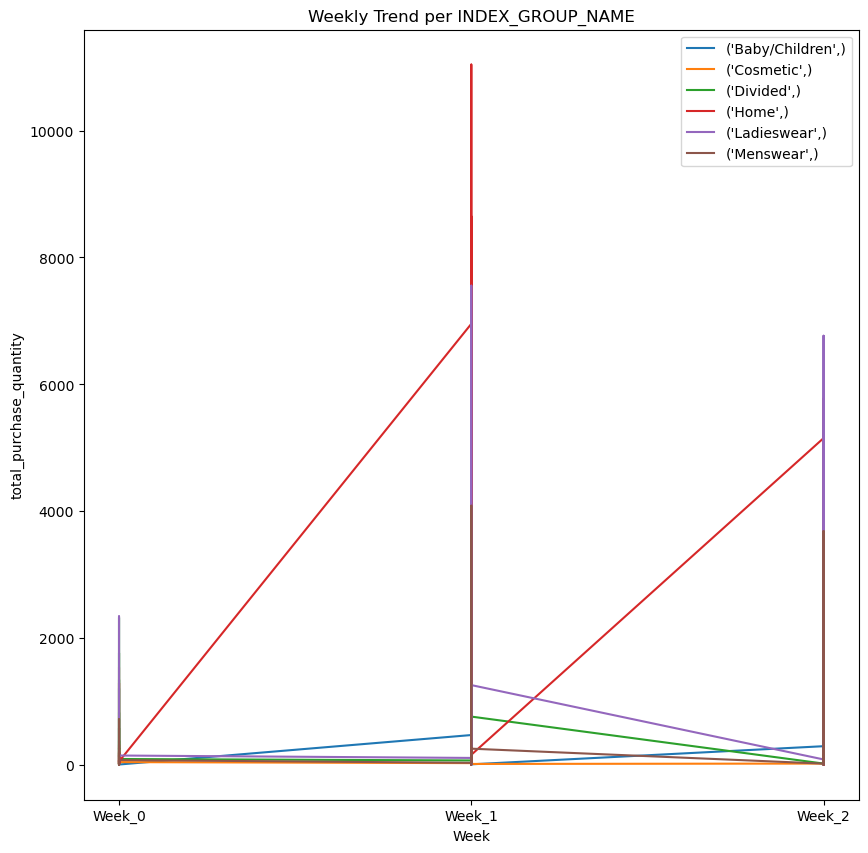

In [2308]:
# Plot per INDEX_GROUP_NAME
plot_trends(weekly_data, 'INDEX_GROUP_NAME', 'total_purchase_quantity', 'Weekly Trend per INDEX_GROUP_NAME')
#plot_trends(weekly_data, 'INDEX_GROUP_NAME', 'total_amount', 'Weekly Sales Amount per INDEX_GROUP_NAME')


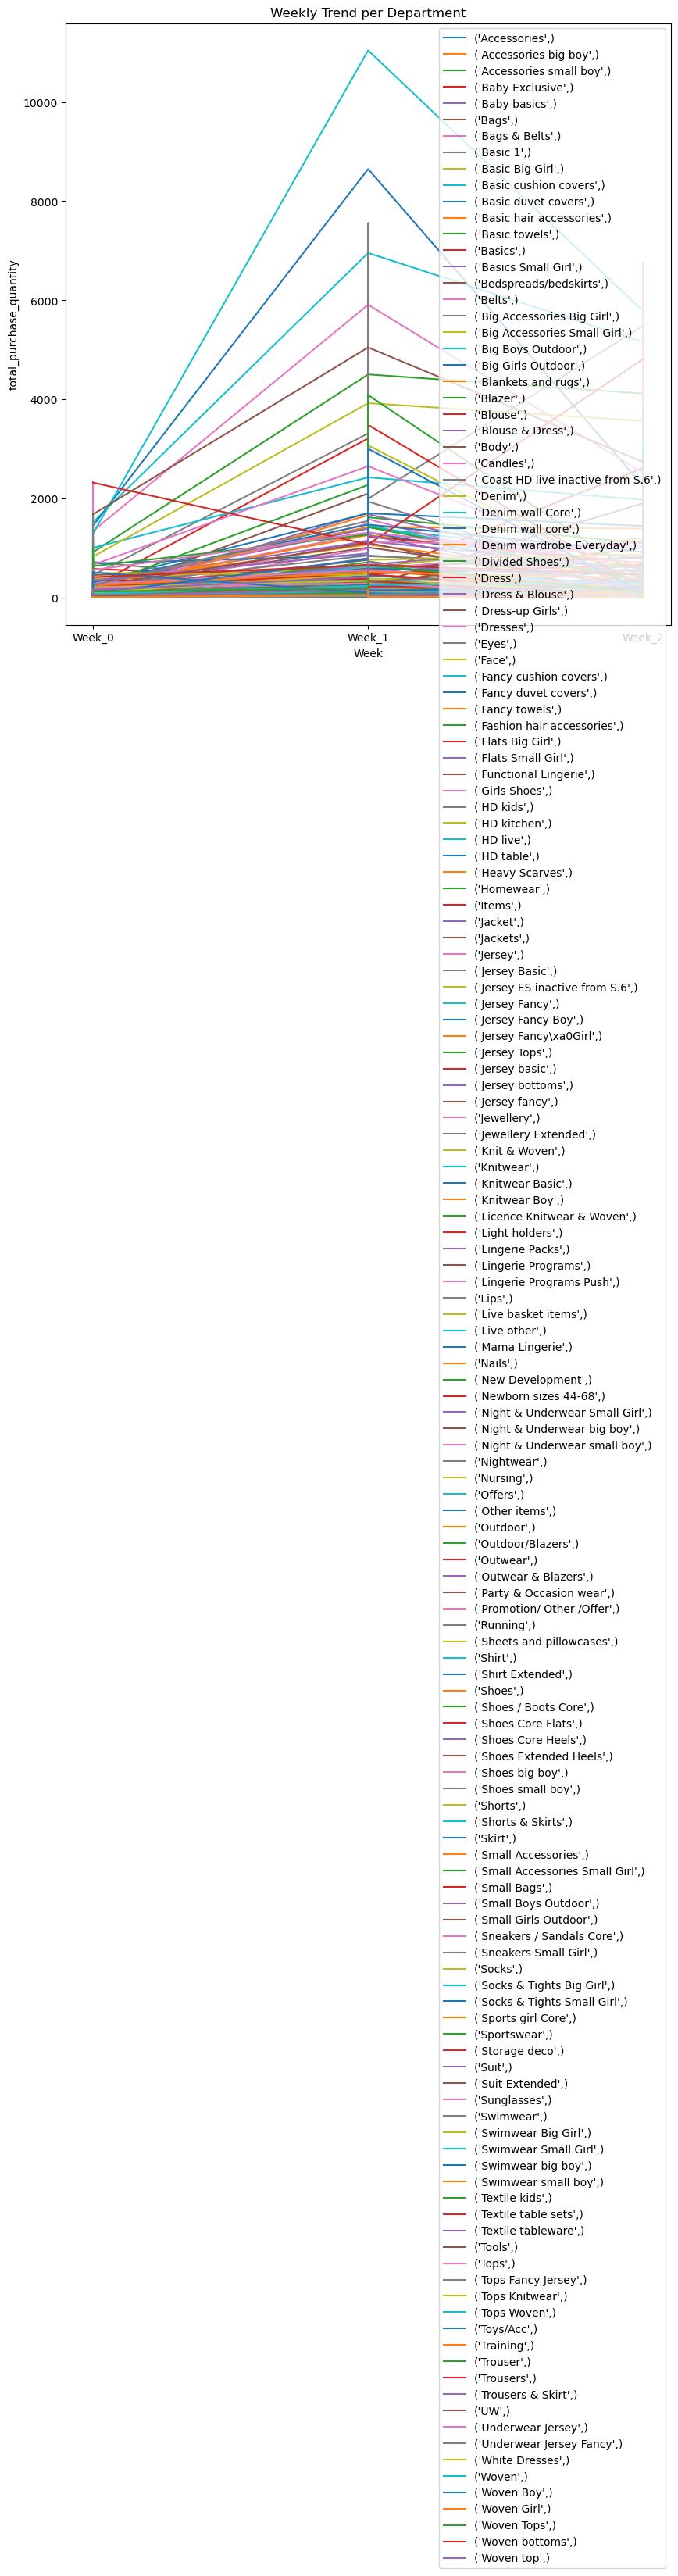

In [2309]:
# Plot per department_name
plot_trends(weekly_data, 'DEPARTMENT_NAME', 'total_purchase_quantity', 'Weekly Trend per Department')
#plot_trends(weekly_data, 'DEPARTMENT_NAME', 'total_amount', 'Weekly Sales Amount per Department')


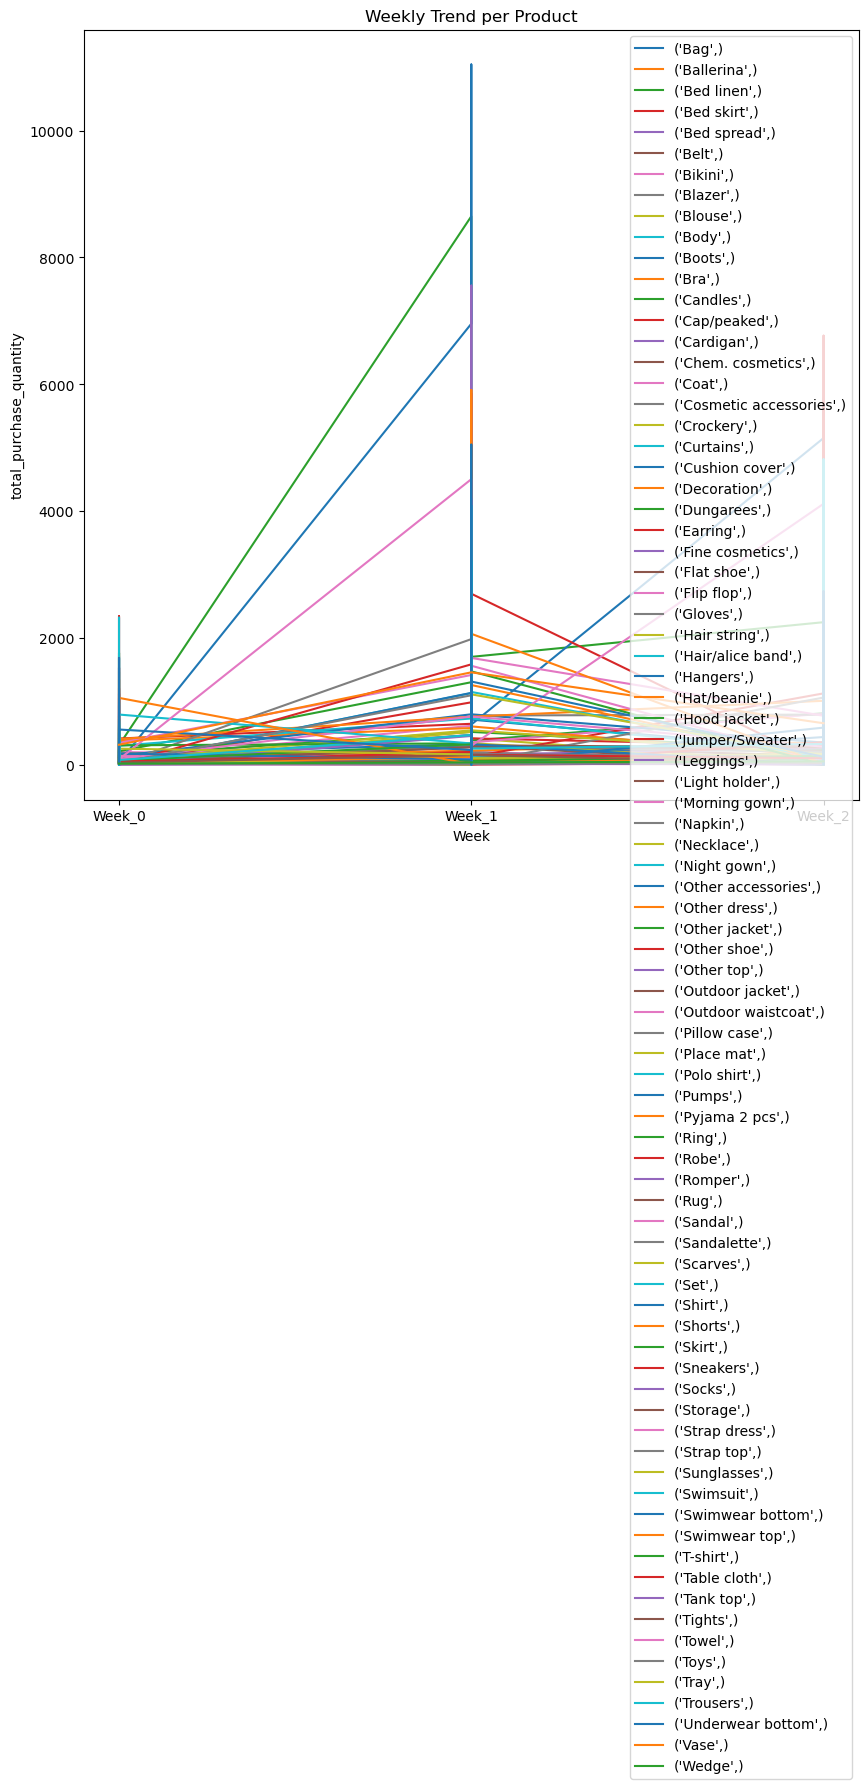

In [2310]:
# Plot per product_name
plot_trends(weekly_data, 'PRODUCT_TYPE_NAME', 'total_purchase_quantity', 'Weekly Trend per Product')
#plot_trends(weekly_data, 'PRODUCT_TYPE_NAME', 'total_amount', 'Weekly Sales Amount per Product')

# Let's simplify above weekely trend plots 

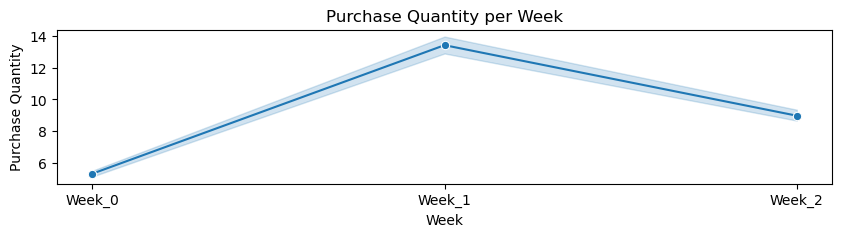

In [2312]:
plt.figure(figsize=(10, 2))
sns.lineplot(x='Week', y='Sale_Quantity', data=merged_data, marker='o')
plt.title('Purchase Quantity per Week')
plt.xlabel('Week')
plt.ylabel('Purchase Quantity')
plt.show()

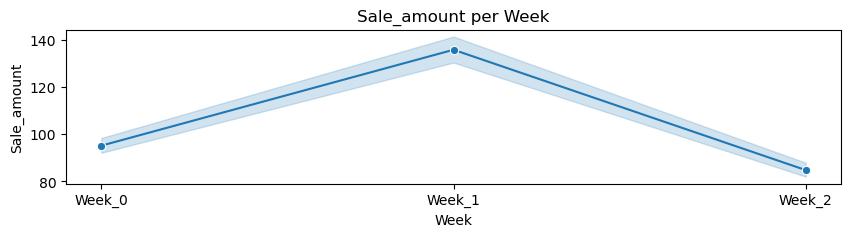

In [2313]:
plt.figure(figsize=(10, 2))
sns.lineplot(x='Week', y='Sale_amount', data=merged_data, marker='o')
plt.title('Sale_amount per Week')
plt.xlabel('Week')
plt.ylabel('Sale_amount')
plt.show()

In [2314]:
# Observing the typical trend behavior, it is evident that week 1 experiences a higher volume of Sale_Quantity as well 
# as a greater total net amount

### 1. Trends with respect to INDEX_GROUP_NAME and Purchase quantity

In [2316]:

weekly_data_INDEX = merged_data.groupby(['Week', 'INDEX_GROUP_NAME']).agg(
    total_purchase_quantity=('Sale_Quantity', 'sum')
).reset_index()

pivot_table = weekly_data_INDEX.pivot_table(index='INDEX_GROUP_NAME', columns='Week', values='total_purchase_quantity', fill_value=0)
pivot_table

Week               Week_0   Week_1   Week_2
INDEX_GROUP_NAME                           
Baby/Children     16108.0  52871.0  29051.0
Cosmetic            130.0    282.0    282.0
Divided           11665.0  29783.0  28739.0
Home               7747.0  41998.0  23942.0
Ladieswear        25010.0  86189.0  57311.0
Menswear           4814.0  21050.0  14086.0

In [2317]:
# percentage increase calculation

def calculate_increase(row):
    if row['Week_0'] == 0:  
        return None  
    return ((row["Week_1"] - row['Week_0']) / row['Week_0']) * 100 

pivot_table['increase_week0_week1'] = pivot_table.apply(calculate_increase, axis=1)

pivot_table

Week               Week_0   Week_1   Week_2  increase_week0_week1
INDEX_GROUP_NAME                                                 
Baby/Children     16108.0  52871.0  29051.0            228.228210
Cosmetic            130.0    282.0    282.0            116.923077
Divided           11665.0  29783.0  28739.0            155.319331
Home               7747.0  41998.0  23942.0            442.119530
Ladieswear        25010.0  86189.0  57311.0            244.618153
Menswear           4814.0  21050.0  14086.0            337.266307

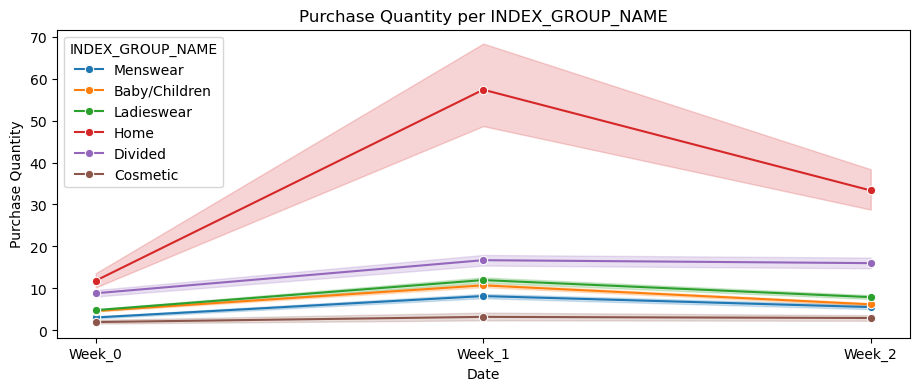

In [2318]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='Week', y='Sale_Quantity', hue='INDEX_GROUP_NAME', data=merged_data, marker='o')
plt.title('Purchase Quantity per INDEX_GROUP_NAME')
plt.xlabel('Date')
plt.ylabel('Purchase Quantity')
plt.legend(title='INDEX_GROUP_NAME')
plt.show()

### 2. Trends with respect to INDEX_GROUP_NAME and Sale_amount

In [2320]:

weekly_data_INDEX = merged_data.groupby(['Week', 'INDEX_GROUP_NAME']).agg(
    total_amount=('Sale_amount', 'sum')
).reset_index()

pivot_table = weekly_data_INDEX.pivot_table(index='INDEX_GROUP_NAME', columns='Week', values='total_amount', fill_value=0)
pivot_table

Week                     Week_0         Week_1         Week_2
INDEX_GROUP_NAME                                             
Baby/Children     238352.231134  568901.874571  256653.465883
Cosmetic             763.382468    1295.612514    1107.865297
Divided           209291.355383  286624.977060  295140.449161
Home               97290.512304  306811.861803  154932.871048
Ladieswear        518839.532606  936416.632954  615841.069879
Menswear          105416.975133  249291.503603  124958.616945

In [2321]:
# percentage increase calculation

def calculate_increase(row):
    if row['Week_0'] == 0:  
        return None  
    return ((row["Week_1"] - row['Week_0']) / row['Week_0']) * 100 

pivot_table['increase_week0_week1'] = pivot_table.apply(calculate_increase, axis=1)

pivot_table

Week                     Week_0         Week_1         Week_2  \
INDEX_GROUP_NAME                                                
Baby/Children     238352.231134  568901.874571  256653.465883   
Cosmetic             763.382468    1295.612514    1107.865297   
Divided           209291.355383  286624.977060  295140.449161   
Home               97290.512304  306811.861803  154932.871048   
Ladieswear        518839.532606  936416.632954  615841.069879   
Menswear          105416.975133  249291.503603  124958.616945   

Week              increase_week0_week1  
INDEX_GROUP_NAME                        
Baby/Children               138.681162  
Cosmetic                     69.719972  
Divided                      36.950223  
Home                        215.356405  
Ladieswear                   80.482900  
Menswear                    136.481367

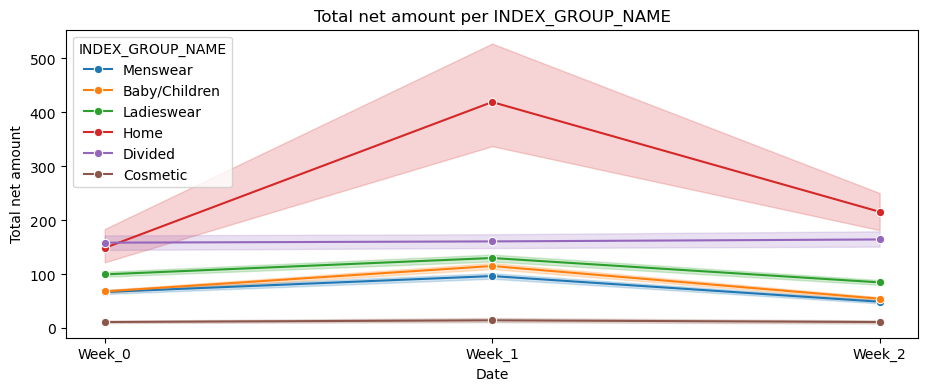

In [2322]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='Week', y='Sale_amount', hue='INDEX_GROUP_NAME', data=merged_data, marker='o')
plt.title('Total net amount per INDEX_GROUP_NAME')
plt.xlabel('Date')
plt.ylabel('Total net amount')
plt.legend(title='INDEX_GROUP_NAME')
plt.show()

In [2323]:
# The above two functions indicate a strong increase in quantity and sales for 'Home', followed by 'Menswear'.
# The percentage increase in sale quantity for 'Home' increased by 442%, and the percentage increase in sales amount for 'Home' 
# increased by 215% after giving discounts in week 1.

### 3. Trends with respect to DEPARTMENT_NAME and Purchase quantity

In [2325]:

weekly_data_INDEX = merged_data.groupby(['Week', 'DEPARTMENT_NAME']).agg(
    total_purchase_quantity=('Sale_Quantity', 'sum')
).reset_index()

pivot_table = weekly_data_INDEX.pivot_table(index='DEPARTMENT_NAME', columns='Week', values='total_purchase_quantity', fill_value=0)
pivot_table

Week                   Week_0  Week_1  Week_2
DEPARTMENT_NAME                              
Accessories             179.0   573.0   266.0
Accessories big boy     275.0  1041.0   525.0
Accessories small boy   549.0   475.0  1342.0
Baby Exclusive          424.0  1926.0   635.0
Baby basics             309.0  1888.0   519.0
...                       ...     ...     ...
Woven Boy               534.0  3093.0  1320.0
Woven Girl              150.0   561.0   245.0
Woven Tops              198.0   832.0   404.0
Woven bottoms           407.0   653.0   462.0
Woven top               189.0  1665.0   625.0

[155 rows x 3 columns]

In [2326]:
# percentage increase calculation

def calculate_increase(row):
    if row['Week_0'] == 0:  
        return None  
    return ((row["Week_1"] - row['Week_0']) / row['Week_0']) * 100 

pivot_table['increase_week0_week1'] = pivot_table.apply(calculate_increase, axis=1)

pivot_table.sort_values("increase_week0_week1",ascending = False)

Week                             Week_0  Week_1  Week_2  increase_week0_week1
DEPARTMENT_NAME                                                              
Offers                             32.0   630.0   224.0           1868.750000
Coast HD live inactive from S.6     1.0    12.0    10.0           1100.000000
Sportswear                         31.0   301.0   156.0            870.967742
Trousers & Skirt                    5.0    45.0    33.0            800.000000
Woven top                         189.0  1665.0   625.0            780.952381
...                                 ...     ...     ...                   ...
Tools                              44.0    15.0    80.0            -65.909091
Divided Shoes                     658.0    89.0   853.0            -86.474164
Live other                         46.0     0.0   157.0           -100.000000
Homewear                           10.0     0.0    25.0           -100.000000
Girls Shoes                         1.0     0.0     0.0           -100.000000

[155 rows x 4 columns]

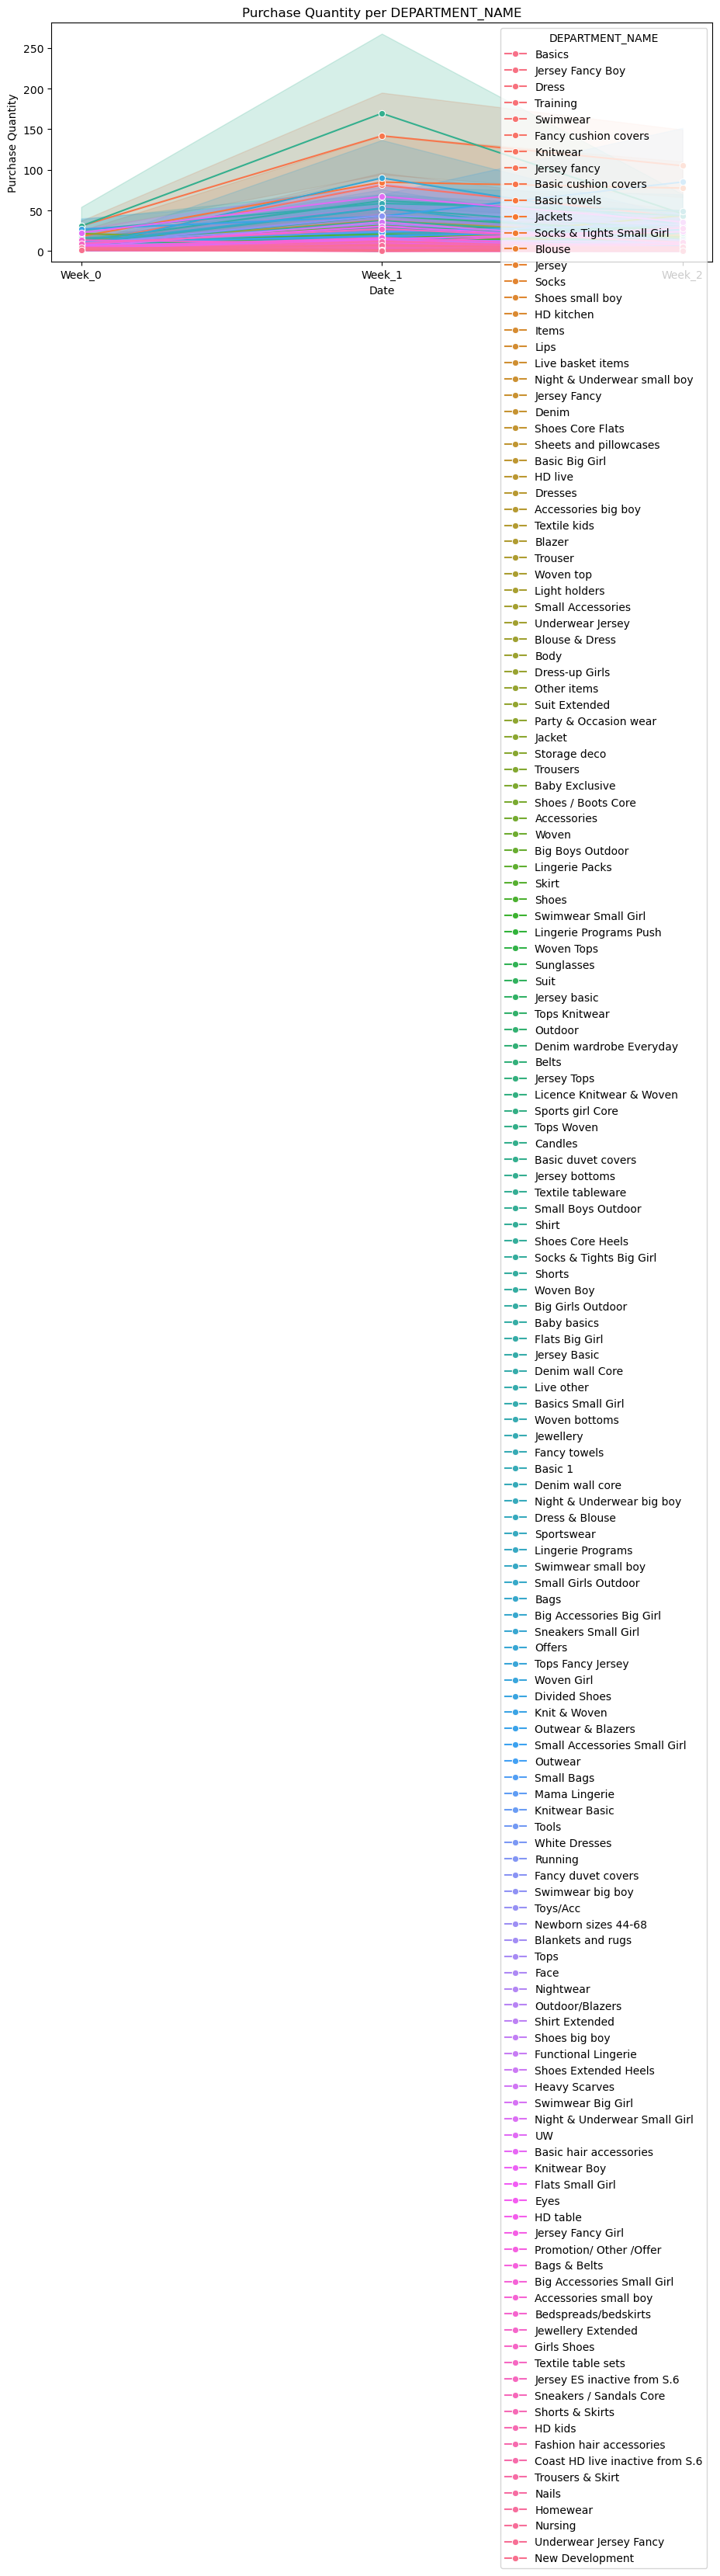

In [2327]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='Week', y='Sale_Quantity', hue='DEPARTMENT_NAME', data=merged_data, marker='o')
plt.title('Purchase Quantity per DEPARTMENT_NAME')
plt.xlabel('Date')
plt.ylabel('Purchase Quantity')
plt.legend(title='DEPARTMENT_NAME')
plt.show()

### 4. Trends with respect to DEPARTMENT_NAME and Sale_amount

In [2329]:

weekly_data_INDEX = merged_data.groupby(['Week', 'DEPARTMENT_NAME']).agg(
    total_amount=('Sale_amount', 'sum')
).reset_index()

pivot_table = weekly_data_INDEX.pivot_table(index='DEPARTMENT_NAME', columns='Week', values='total_amount', fill_value=0)
pivot_table

Week                         Week_0        Week_1        Week_2
DEPARTMENT_NAME                                                
Accessories             1491.102326   2447.307930    923.689371
Accessories big boy     1676.106423   3208.420529   1039.754164
Accessories small boy   3501.334959   2926.587204   6984.393199
Baby Exclusive          6739.880622  20097.289901   5680.532355
Baby basics             2982.181291  11640.220440   2052.248835
...                             ...           ...           ...
Woven Boy               5872.110364  17289.412938   4283.660835
Woven Girl              2770.153542   7703.844213   3026.479003
Woven Tops              5066.059162  11905.027106   4200.830932
Woven bottoms          21506.594230  14422.287427  14353.569664
Woven top               4929.618962  12886.320153   2871.229289

[155 rows x 3 columns]

In [2330]:
# percentage increase calculation

def calculate_increase(row):
    if row['Week_0'] == 0:  
        return None  
    return ((row["Week_1"] - row['Week_0']) / row['Week_0']) * 100 

pivot_table['increase_week0_week1'] = pivot_table.apply(calculate_increase, axis=1)

pivot_table.sort_values("increase_week0_week1",ascending = False)

Week                                   Week_0        Week_1        Week_2  \
DEPARTMENT_NAME                                                             
Tops Woven                          42.275361    503.523410    361.288842   
Coast HD live inactive from S.6      3.678238     19.214244      8.031870   
Fancy towels                      1495.072973   6159.272074   2751.527486   
Small Girls Outdoor               6031.372264  24644.078568      0.000000   
Shoes big boy                     9831.526883  39685.417010   6974.049554   
...                                       ...           ...           ...   
Trousers                         40920.771224   6992.520480  64972.137232   
Divided Shoes                    18375.348659   1791.965427  20211.469404   
Live other                        1291.587669      0.000000   3788.873621   
Homewear                           280.295942      0.000000    588.928625   
Girls Shoes                         23.266487      0.000000      0.000000   

Week                             increase_week0_week1  
DEPARTMENT_NAME                                        
Tops Woven                                1091.056431  
Coast HD live inactive from S.6            422.376340  
Fancy towels                               311.971334  
Small Girls Outdoor                        308.598201  
Shoes big boy                              303.654666  
...                                               ...  
Trousers                                   -82.912051  
Divided Shoes                              -90.247992  
Live other                                -100.000000  
Homewear                                  -100.000000  
Girls Shoes                               -100.000000  

[155 rows x 4 columns]

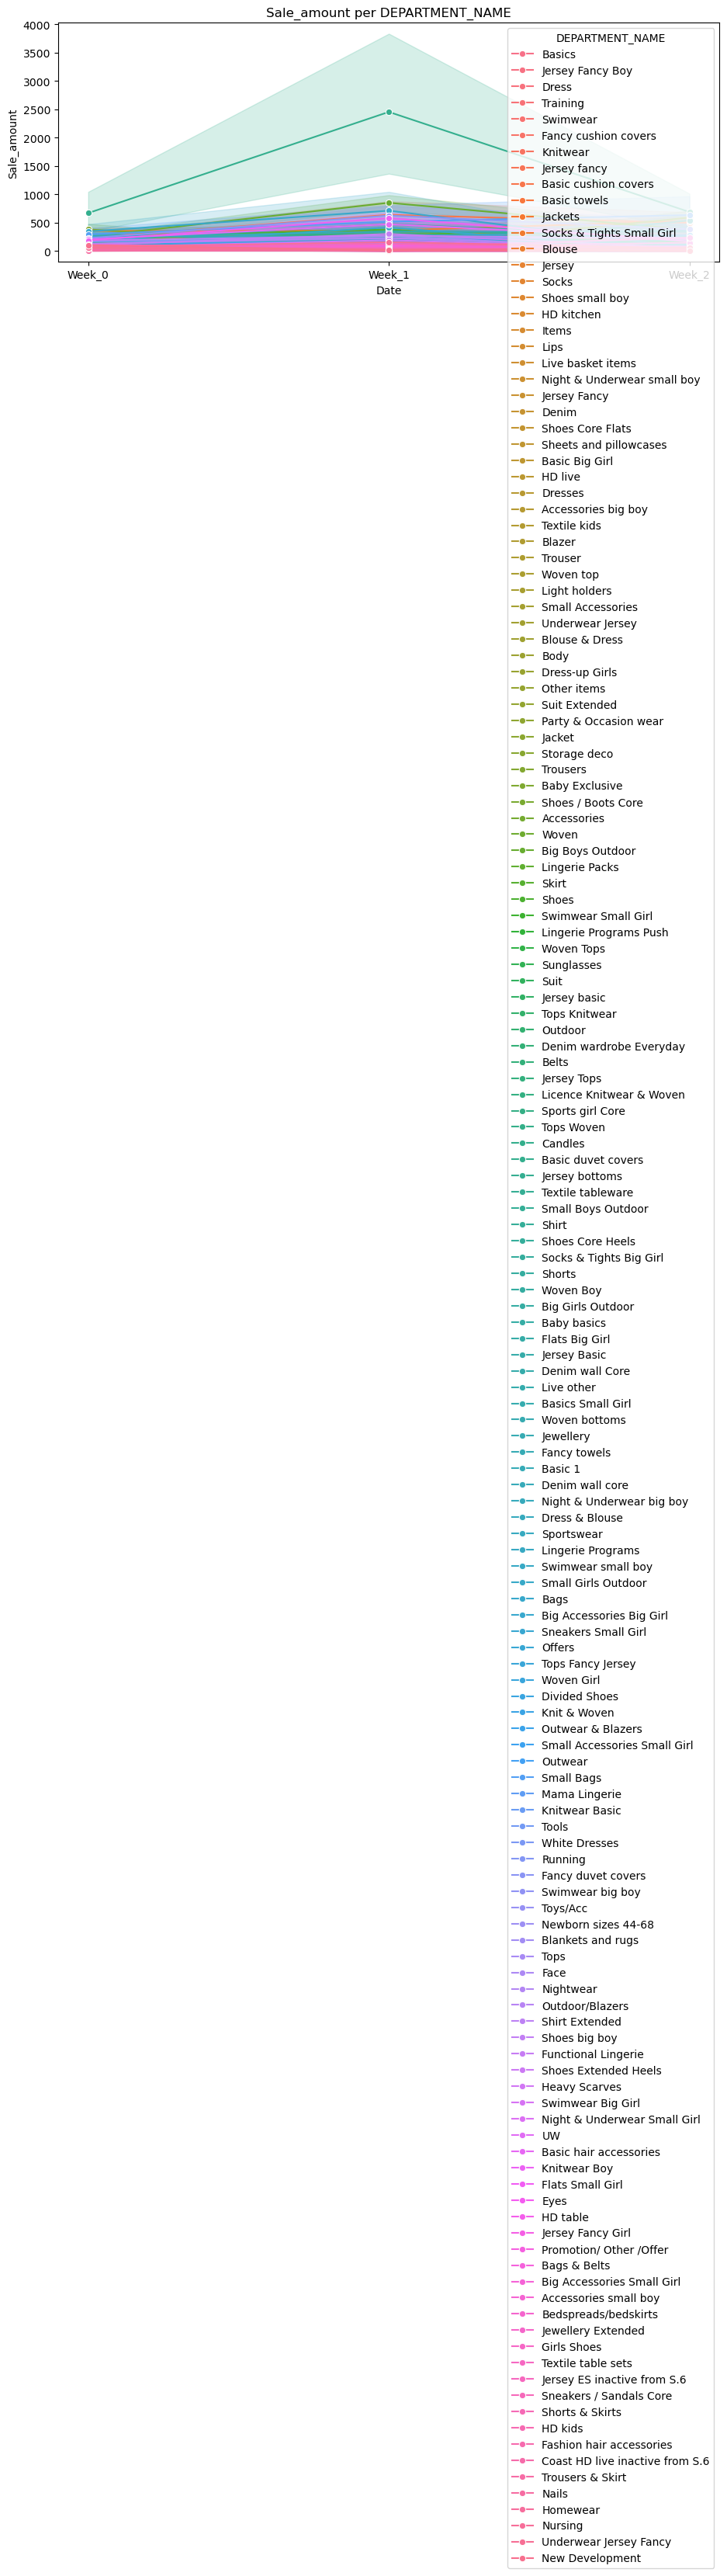

In [2331]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='Week', y='Sale_amount', hue='DEPARTMENT_NAME', data=merged_data, marker='o')
plt.title('Sale_amount per DEPARTMENT_NAME')
plt.xlabel('Date')
plt.ylabel('Sale_amount')
plt.legend(title='DEPARTMENT_NAME')
plt.show()

In [2332]:
# The above two functions indicate a strong increase in quantity and sales for 'Offers' and "Tops Woven" respectively, 
# followed by 'Coast HD live inactive from S.6'.
# The percentage increase in sale quantity for 'Offers' increased by 1868%, and the percentage increase in sales amount for 'Tops Woven' 
# increased by 1091% after giving discounts in week 1.

### 5. Trends with respect to PRODUCT_TYPE_NAME and Sale quantity

In [2334]:

weekly_data_INDEX = merged_data.groupby(['Week', 'PRODUCT_TYPE_NAME']).agg(
    total_purchase_quantity=('Sale_Quantity', 'sum')
).reset_index()

pivot_table = weekly_data_INDEX.pivot_table(index='PRODUCT_TYPE_NAME', columns='Week', values='total_purchase_quantity', fill_value=0)
pivot_table

Week               Week_0   Week_1   Week_2
PRODUCT_TYPE_NAME                          
Bag                 432.0   1538.0    925.0
Ballerina            83.0     40.0     89.0
Bed linen          1749.0  10346.0   3684.0
Bed skirt             5.0     13.0      6.0
Bed spread           23.0     45.0     98.0
...                   ...      ...      ...
Tray                290.0   1266.0    378.0
Trousers           9206.0  27466.0  19576.0
Underwear bottom   3503.0  11277.0   5698.0
Vase                312.0   1454.0    651.0
Wedge                14.0     33.0     49.0

[83 rows x 3 columns]

In [2335]:
# percentage increase calculation

def calculate_increase(row):
    if row['Week_0'] == 0:  
        return None  
    return ((row["Week_1"] - row['Week_0']) / row['Week_0']) * 100 

pivot_table['increase_week0_week1'] = pivot_table.apply(calculate_increase, axis=1)

pivot_table.sort_values("increase_week0_week1",ascending = False)

Week                  Week_0  Week_1  Week_2  increase_week0_week1
PRODUCT_TYPE_NAME                                                 
Necklace               101.0  1077.0   286.0            966.336634
Sandal                 221.0  2327.0   521.0            952.941176
Morning gown             1.0     9.0     3.0            800.000000
Set                     56.0   500.0    77.0            792.857143
Strap dress             88.0   757.0   281.0            760.227273
...                      ...     ...     ...                   ...
Curtains                91.0    94.0   157.0              3.296703
Toys                     9.0     9.0    30.0              0.000000
Ballerina               83.0    40.0    89.0            -51.807229
Cosmetic accessories    39.0    10.0    66.0            -74.358974
Robe                    10.0     0.0    25.0           -100.000000

[83 rows x 4 columns]

In [2336]:
# ascending = True

def calculate_increase(row):
    if row['Week_0'] == 0:  
        return None  
    return ((row["Week_1"] - row['Week_0']) / row['Week_0']) * 100 

pivot_table['increase_week0_week1'] = pivot_table.apply(calculate_increase, axis=1)

pivot_table.sort_values("increase_week0_week1",ascending = True)

Week                  Week_0  Week_1  Week_2  increase_week0_week1
PRODUCT_TYPE_NAME                                                 
Robe                    10.0     0.0    25.0           -100.000000
Cosmetic accessories    39.0    10.0    66.0            -74.358974
Ballerina               83.0    40.0    89.0            -51.807229
Toys                     9.0     9.0    30.0              0.000000
Curtains                91.0    94.0   157.0              3.296703
...                      ...     ...     ...                   ...
Strap dress             88.0   757.0   281.0            760.227273
Set                     56.0   500.0    77.0            792.857143
Morning gown             1.0     9.0     3.0            800.000000
Sandal                 221.0  2327.0   521.0            952.941176
Necklace               101.0  1077.0   286.0            966.336634

[83 rows x 4 columns]

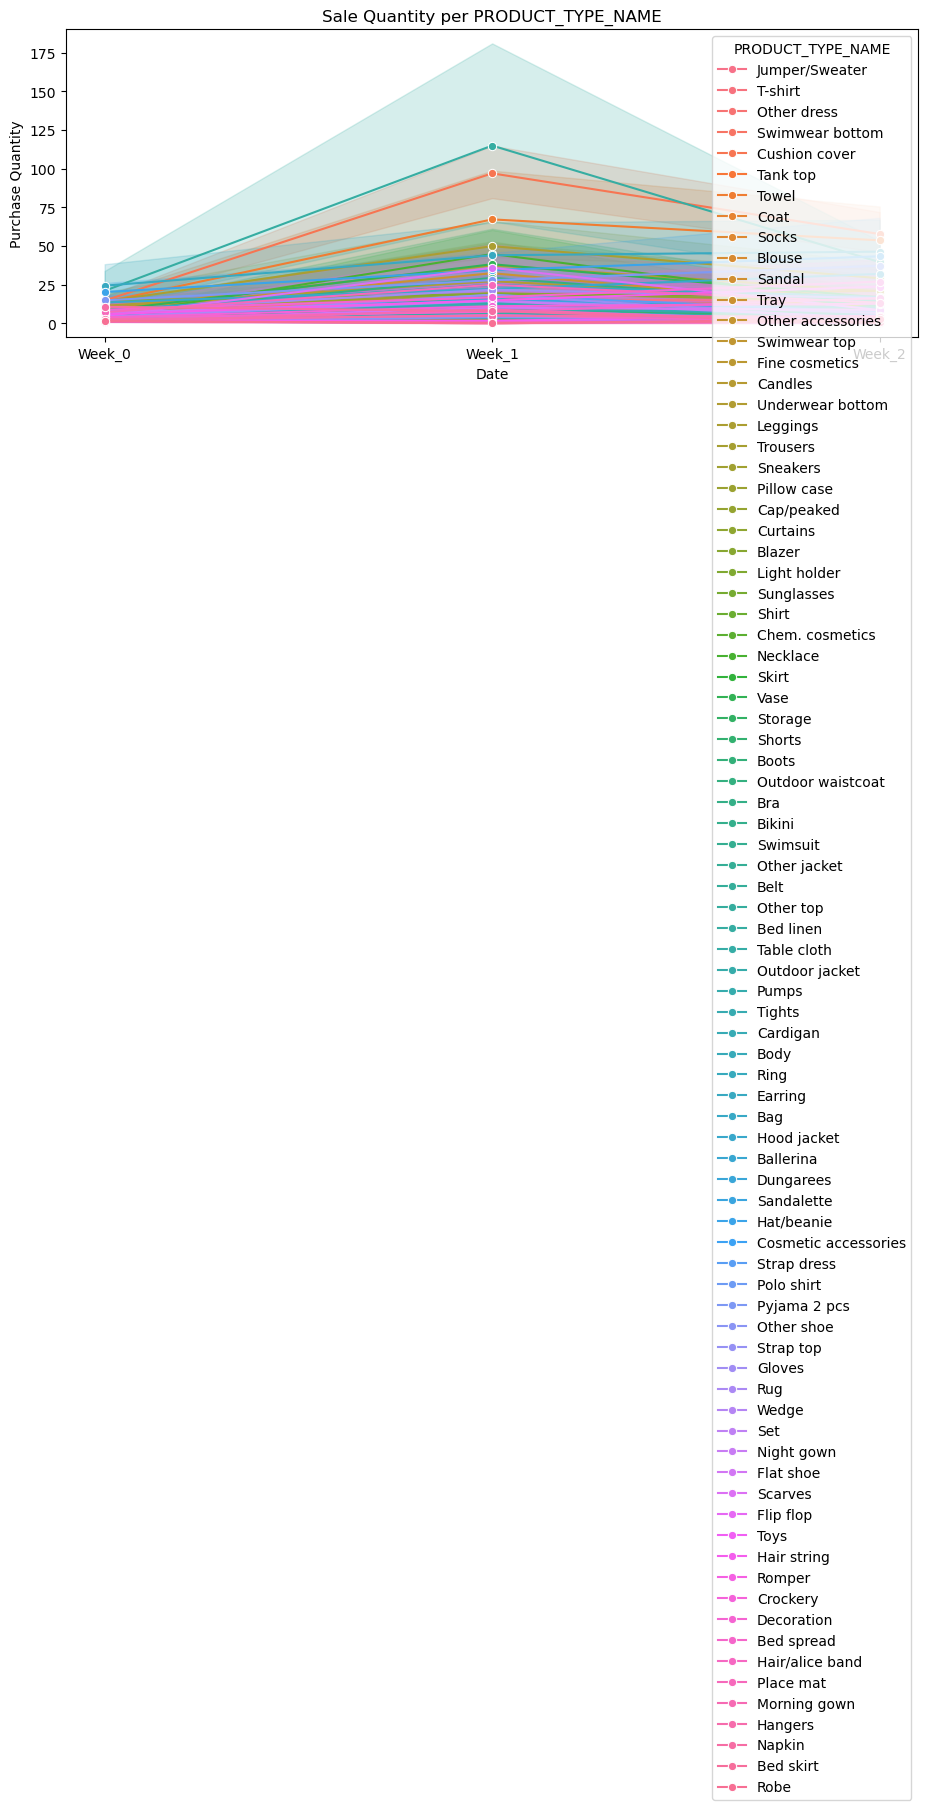

In [2337]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='Week', y='Sale_Quantity', hue='PRODUCT_TYPE_NAME', data=merged_data, marker='o')
plt.title('Sale Quantity per PRODUCT_TYPE_NAME')
plt.xlabel('Date')
plt.ylabel('Purchase Quantity')
plt.legend(title='PRODUCT_TYPE_NAME')
plt.show()

### 6. Trends with respect to PRODUCT_TYPE_NAME and Sale_amount

In [2339]:

weekly_data_INDEX = merged_data.groupby(['Week', 'PRODUCT_TYPE_NAME']).agg(
    total_amount=('Sale_amount', 'sum')
).reset_index()

pivot_table = weekly_data_INDEX.pivot_table(index='PRODUCT_TYPE_NAME', columns='Week', values='total_amount', fill_value=0)
pivot_table

Week                      Week_0         Week_1         Week_2
PRODUCT_TYPE_NAME                                             
Bag                 12640.679154   24398.740624   14003.826362
Ballerina            3134.172772    1117.150760    2418.151386
Bed linen           39703.552153  149558.625166   50644.555650
Bed skirt             236.420530     682.402500      74.962500
Bed spread            880.963559    1454.576265    2775.841866
...                          ...            ...            ...
Tray                 4570.778695   14671.394839    4408.295906
Trousers           188371.698588  280287.658539  234558.825560
Underwear bottom    33841.473824   79198.741933   36937.819979
Vase                 2514.628323    4762.474636    3576.757258
Wedge                 401.155166     365.880999    1037.647204

[83 rows x 3 columns]

In [2340]:
# percentage increase calculation

def calculate_increase(row):
    if row['Week_0'] == 0:  
        return None  
    return ((row["Week_1"] - row['Week_0']) / row['Week_0']) * 100 

pivot_table['increase_week0_week1'] = pivot_table.apply(calculate_increase, axis=1)

pivot_table.sort_values("increase_week0_week1",ascending = False)

Week                        Week_0         Week_1        Week_2  \
PRODUCT_TYPE_NAME                                                 
Tights                  226.898428     898.120744    120.259088   
Strap top              2260.558036    8733.534139   1363.755298   
Bed linen             39703.552153  149558.625166  50644.555650   
Candles                1857.497264    6736.687447   3551.478357   
Strap dress            2504.071804    8667.787774   1532.063142   
...                            ...            ...           ...   
Curtains               1933.529683    1208.691668   3788.873621   
Ballerina              3134.172772    1117.150760   2418.151386   
Bikini                 4319.111966    1249.475400   2383.569870   
Cosmetic accessories    174.053127      43.256868    272.029564   
Robe                    280.295942       0.000000    588.928625   

Week                  increase_week0_week1  
PRODUCT_TYPE_NAME                           
Tights                          295.825017  
Strap top                       286.344168  
Bed linen                       276.688274  
Candles                         262.675498  
Strap dress                     246.147733  
...                                    ...  
Curtains                        -37.487814  
Ballerina                       -64.355802  
Bikini                          -71.071012  
Cosmetic accessories            -75.147319  
Robe                           -100.000000  

[83 rows x 4 columns]

In [2341]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='Week', y='Sale_amount', hue='PRODUCT_TYPE_NAME', data=merged_data, marker='o')
plt.title('Sale_amount per PRODUCT_TYPE_NAME')
plt.xlabel('Date')
plt.ylabel('Sale_amount')
plt.legend(title='PRODUCT_TYPE_NAME')
plt.show()

In [2342]:
# The above two functions indicate a strong increase in quantity and sales for 'Necklace' and "Tights" respectively, 
# followed by 'sandal' and "Strap top respectively".
# The percentage increase in sale quantity for 'Necklace' increased by 966%, and the percentage increase in sales amount for 'Tights' 
# increased by 295% after giving discounts in week 1.

In [2343]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='date', y='Sale_amount', hue='PRODUCT_TYPE_NAME', data=merged_data, marker='o')
plt.title('Sale_amount per PRODUCT_TYPE_NAME')
plt.xlabel('Date')
plt.ylabel('Sale_amount')
plt.legend(title='PRODUCT_TYPE_NAME')
plt.show()


# just to show the sale trend day wise for all products.

# Model Building

In [2345]:
# Model building here is just for demo purpose as forecast can't be done or have very less accuracy with only one month of historical 
# days,until we will assume target month forecast will be similar to trained month data.

In [2346]:
# applying basic model, can try other models "SARIMAX","fbprophet" etc

In [2347]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2348]:
#aggregation by week

weekly_data = merged_data.groupby(['date', 'Week']).sum().reset_index()
weekly_data.head()

date    Week  Sale_Quantity    Sale_amount  gross_amount  \
0 2017-10-02  Week_0         8360.0  151155.135863     159305.44   
1 2017-10-03  Week_0        11504.0  203390.298896     213872.11   
2 2017-10-04  Week_0        11226.0  196479.757329     207088.84   
3 2017-10-05  Week_0         8115.0  148590.174984     156752.98   
4 2017-10-06  Week_0         7084.0  128276.136272     134782.31   

        article  PRODUCT_CODE  \
0  770885356398     770885350   
1  853547022235     853547015   
2  830120088967     830120082   
3  792442262362     792442256   
4  774220413446     774220407   

                                   PRODUCT_TYPE_NAME  DEPARTMENT_ID  \
0  Jumper/SweaterT-shirtT-shirtOther dressOther d...         506050   
1  T-shirtShirtJumper/SweaterShirtShirtShirtJumpe...         561861   
2  TrousersJumper/SweaterTrousersJumper/SweaterOt...         544568   
3  TrousersCushion coverTrousersT-shirtSneakersNi...         521729   
4  SwimsuitBraBraCushion coverTank topBraTrousers...         500846   

                                     DEPARTMENT_NAME  \
0  BasicsJersey Fancy BoyJersey Fancy BoyDressDre...   
1  Jersey BasicDress & BlouseKnitwearDress & Blou...   
2  Jersey basicTops KnitwearTrouserJersey FancyOu...   
3  Woven bottomsBasic cushion coversDenimJersey F...   
4  SwimwearLingerie Programs PushLingerie Program...   

                                    INDEX_GROUP_NAME  
0  MenswearBaby/ChildrenBaby/ChildrenLadieswearLa...  
1  LadieswearBaby/ChildrenLadieswearBaby/Children...  
2  Baby/ChildrenDividedMenswearMenswearBaby/Child...  
3  LadieswearHomeBaby/ChildrenBaby/ChildrenBaby/C...  
4  LadieswearLadieswearLadieswearHomeLadieswearLa...

In [2349]:
# Prepare data for ARIMA
arima_data = weekly_data[['date', 'Sale_Quantity']]
arima_data.set_index('date', inplace=True)

# Split the data into training and test sets
train_data = arima_data.iloc[:-5]  # Use all dates except last 5 dates for training
test_data = arima_data.iloc[-5:]  # Use last 5 dates for testing


In [2350]:
train_data.shape,test_data.shape

((16, 1), (5, 1))

In [2351]:
test_data

Sale_Quantity
date                     
2017-10-18        22638.0
2017-10-19        21542.0
2017-10-20        20816.0
2017-10-21        21420.0
2017-10-22        21534.0

In [2352]:
# Model Intialisation

model = ARIMA(train_data, order=(2, 1, 0))  # ARIMA(p,d,q) with p=5, d=1, q=0
model_fit = model.fit()

# predictions on test 
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Merge the test data with the predicted data for comparison
evaluation_df = test_data.copy()
evaluation_df['y_pred'] = predictions

# evaluation metrics
mae = mean_absolute_error(evaluation_df['Sale_Quantity'], evaluation_df['y_pred'])
mse = mean_squared_error(evaluation_df['Sale_Quantity'], evaluation_df['y_pred'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Sale_Quantity'], label='Train')
plt.plot(test_data.index, test_data['Sale_Quantity'], label='Test')
plt.plot(predictions.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Model - Sale Quantity Forecast')
plt.xlabel('Date')
plt.ylabel('Purchase Quantity')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 1949.9419103178946
Mean Squared Error (MSE): 4167412.018364138
Root Mean Squared Error (RMSE): 2041.4240172889458


In [2353]:
predictions

2017-10-18    23503.722790
2017-10-19    23560.574519
2017-10-20    23548.041318
2017-10-21    23543.754242
2017-10-22    23543.616682
Freq: D, Name: predicted_mean, dtype: float64

In [2354]:
# The performance is not very good due to the limited historical data. However, we can still identify some trends in the forecast.
# Assuming the same demand/trend for the next year, we can infer the demand for products from the above analysis.

# Suppose I have inventory items-Answer to question 3

In [2356]:
merged_data.head()

date  Sale_Quantity  Sale_amount  gross_amount    article  \
0 2017-10-02            1.0    19.282061         19.99  494340001   
1 2017-10-02            2.0    15.411960         15.98  236505002   
2 2017-10-02            1.0     7.603579          7.99  236505002   
3 2017-10-02            1.0    34.678851         34.99  434045002   
4 2017-10-02            4.0   132.961475        139.96  434045002   

   PRODUCT_CODE PRODUCT_TYPE_NAME  DEPARTMENT_ID   DEPARTMENT_NAME  \
0        494340    Jumper/Sweater            176            Basics   
1        236505           T-shirt            198  Jersey Fancy Boy   
2        236505           T-shirt            198  Jersey Fancy Boy   
3        434045       Other dress             59             Dress   
4        434045       Other dress             59             Dress   

  INDEX_GROUP_NAME    Week  
0         Menswear  Week_0  
1    Baby/Children  Week_0  
2    Baby/Children  Week_0  
3       Ladieswear  Week_0  
4       Ladieswear  Week_0

In [2357]:
merged_data["Sale_Quantity"].value_counts()

Sale_Quantity
1.0       8457
0.0       6704
2.0       5474
3.0       3849
4.0       2789
          ... 
280.0        1
290.0        1
406.0        1
1021.0       1
368.0        1
Name: count, Length: 287, dtype: int64

In [2358]:
# creating random values for inventory

merged_data['inventory'] = merged_data.apply(lambda x: np.random.randint(1, 101), axis=1)

In [2359]:
merged_data['date'] = pd.to_datetime(merged_data['date'])

weekly_data = merged_data.groupby(['date', 'Week']).sum().reset_index()

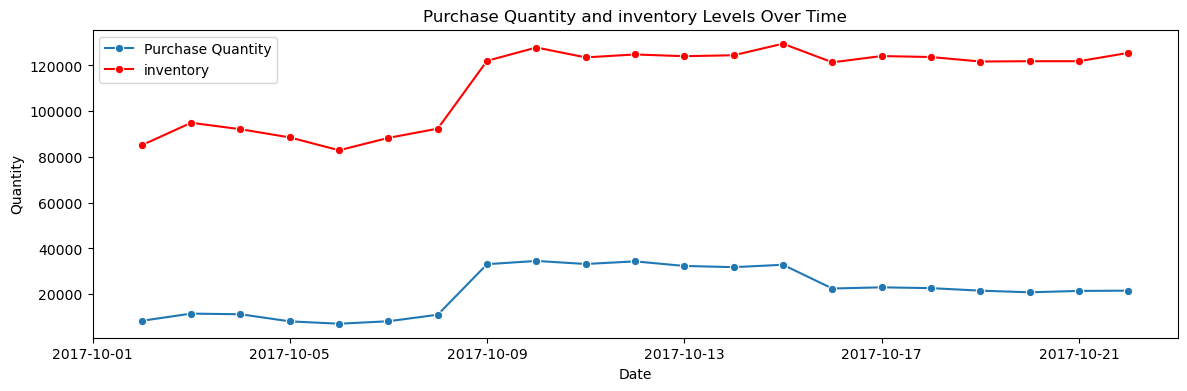

In [2360]:
# purchase quantity vs stock
plt.figure(figsize=(14, 4))
sns.lineplot(x='date', y='Sale_Quantity', data=weekly_data, marker='o', label='Purchase Quantity')
sns.lineplot(x='date', y='inventory', data=weekly_data, marker='o', label='inventory', color='red')
plt.title('Sale  Quantity and inventory Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [2361]:
weekly_data.head(2)

date    Week  Sale_Quantity    Sale_amount  gross_amount  \
0 2017-10-02  Week_0         8360.0  151155.135863     159305.44   
1 2017-10-03  Week_0        11504.0  203390.298896     213872.11   

        article  PRODUCT_CODE  \
0  770885356398     770885350   
1  853547022235     853547015   

                                   PRODUCT_TYPE_NAME  DEPARTMENT_ID  \
0  Jumper/SweaterT-shirtT-shirtOther dressOther d...         506050   
1  T-shirtShirtJumper/SweaterShirtShirtShirtJumpe...         561861   

                                     DEPARTMENT_NAME  \
0  BasicsJersey Fancy BoyJersey Fancy BoyDressDre...   
1  Jersey BasicDress & BlouseKnitwearDress & Blou...   

                                    INDEX_GROUP_NAME  inventory  
0  MenswearBaby/ChildrenBaby/ChildrenLadieswearLa...      85141  
1  LadieswearBaby/ChildrenLadieswearBaby/Children...      94924

In [2362]:

# Assume daily sales rate

weekly_data["inventory_remains"] = weekly_data['inventory'] / (weekly_data['Sale_Quantity'] / 7) 
weekly_data.head()

date    Week  Sale_Quantity    Sale_amount  gross_amount  \
0 2017-10-02  Week_0         8360.0  151155.135863     159305.44   
1 2017-10-03  Week_0        11504.0  203390.298896     213872.11   
2 2017-10-04  Week_0        11226.0  196479.757329     207088.84   
3 2017-10-05  Week_0         8115.0  148590.174984     156752.98   
4 2017-10-06  Week_0         7084.0  128276.136272     134782.31   

        article  PRODUCT_CODE  \
0  770885356398     770885350   
1  853547022235     853547015   
2  830120088967     830120082   
3  792442262362     792442256   
4  774220413446     774220407   

                                   PRODUCT_TYPE_NAME  DEPARTMENT_ID  \
0  Jumper/SweaterT-shirtT-shirtOther dressOther d...         506050   
1  T-shirtShirtJumper/SweaterShirtShirtShirtJumpe...         561861   
2  TrousersJumper/SweaterTrousersJumper/SweaterOt...         544568   
3  TrousersCushion coverTrousersT-shirtSneakersNi...         521729   
4  SwimsuitBraBraCushion coverTank topBraTrousers...         500846   

                                     DEPARTMENT_NAME  \
0  BasicsJersey Fancy BoyJersey Fancy BoyDressDre...   
1  Jersey BasicDress & BlouseKnitwearDress & Blou...   
2  Jersey basicTops KnitwearTrouserJersey FancyOu...   
3  Woven bottomsBasic cushion coversDenimJersey F...   
4  SwimwearLingerie Programs PushLingerie Program...   

                                    INDEX_GROUP_NAME  inventory  \
0  MenswearBaby/ChildrenBaby/ChildrenLadieswearLa...      85141   
1  LadieswearBaby/ChildrenLadieswearBaby/Children...      94924   
2  Baby/ChildrenDividedMenswearMenswearBaby/Child...      92097   
3  LadieswearHomeBaby/ChildrenBaby/ChildrenBaby/C...      88524   
4  LadieswearLadieswearLadieswearHomeLadieswearLa...      82898   

   inventory_remains  
0          71.290311  
1          57.759736  
2          57.427312  
3          76.360813  
4          81.915020

In [2363]:

# lag features for stock levels

weekly_data['stock_lag1'] = weekly_data['inventory'].shift(1)
weekly_data['stock_lag2'] = weekly_data['inventory'].shift(2)

weekly_data = weekly_data.dropna()

In [2364]:
weekly_data.head()

date    Week  Sale_Quantity    Sale_amount  gross_amount  \
2 2017-10-04  Week_0        11226.0  196479.757329     207088.84   
3 2017-10-05  Week_0         8115.0  148590.174984     156752.98   
4 2017-10-06  Week_0         7084.0  128276.136272     134782.31   
5 2017-10-07  Week_0         8164.0  147093.518354     154417.58   
6 2017-10-08  Week_0        11021.0  194968.967329     205409.23   

        article  PRODUCT_CODE  \
2  830120088967     830120082   
3  792442262362     792442256   
4  774220413446     774220407   
5  801091773644     801091767   
6  864596485239     864596478   

                                   PRODUCT_TYPE_NAME  DEPARTMENT_ID  \
2  TrousersJumper/SweaterTrousersJumper/SweaterOt...         544568   
3  TrousersCushion coverTrousersT-shirtSneakersNi...         521729   
4  SwimsuitBraBraCushion coverTank topBraTrousers...         500846   
5  Cushion coverRomperBlazerOutdoor waistcoatBlaz...         513263   
6  DungareesDungareesSwimwear bottomSwimwear topS...         556196   

                                     DEPARTMENT_NAME  \
2  Jersey basicTops KnitwearTrouserJersey FancyOu...   
3  Woven bottomsBasic cushion coversDenimJersey F...   
4  SwimwearLingerie Programs PushLingerie Program...   
5  OffersBaby ExclusiveSuit ExtendedBig Boys Outd...   
6  Woven GirlWoven GirlSwimwearSwimwearSwimwearSw...   

                                    INDEX_GROUP_NAME  inventory  \
2  Baby/ChildrenDividedMenswearMenswearBaby/Child...      92097   
3  LadieswearHomeBaby/ChildrenBaby/ChildrenBaby/C...      88524   
4  LadieswearLadieswearLadieswearHomeLadieswearLa...      82898   
5  HomeBaby/ChildrenMenswearBaby/ChildrenMenswear...      88324   
6  Baby/ChildrenBaby/ChildrenMenswearLadieswearMe...      92355   

   inventory_remains  stock_lag1  stock_lag2  
2          57.427312     94924.0     85141.0  
3          76.360813     92097.0     94924.0  
4          81.915020     88524.0     92097.0  
5          75.731014     82898.0     88524.0  
6          58.659378     88324.0     82898.0

In [2365]:
arima_data = weekly_data.set_index('date')
arima_data.head()

Week  Sale_Quantity    Sale_amount  gross_amount       article  \
date                                                                           
2017-10-04  Week_0        11226.0  196479.757329     207088.84  830120088967   
2017-10-05  Week_0         8115.0  148590.174984     156752.98  792442262362   
2017-10-06  Week_0         7084.0  128276.136272     134782.31  774220413446   
2017-10-07  Week_0         8164.0  147093.518354     154417.58  801091773644   
2017-10-08  Week_0        11021.0  194968.967329     205409.23  864596485239   

            PRODUCT_CODE                                  PRODUCT_TYPE_NAME  \
date                                                                          
2017-10-04     830120082  TrousersJumper/SweaterTrousersJumper/SweaterOt...   
2017-10-05     792442256  TrousersCushion coverTrousersT-shirtSneakersNi...   
2017-10-06     774220407  SwimsuitBraBraCushion coverTank topBraTrousers...   
2017-10-07     801091767  Cushion coverRomperBlazerOutdoor waistcoatBlaz...   
2017-10-08     864596478  DungareesDungareesSwimwear bottomSwimwear topS...   

            DEPARTMENT_ID                                    DEPARTMENT_NAME  \
date                                                                           
2017-10-04         544568  Jersey basicTops KnitwearTrouserJersey FancyOu...   
2017-10-05         521729  Woven bottomsBasic cushion coversDenimJersey F...   
2017-10-06         500846  SwimwearLingerie Programs PushLingerie Program...   
2017-10-07         513263  OffersBaby ExclusiveSuit ExtendedBig Boys Outd...   
2017-10-08         556196  Woven GirlWoven GirlSwimwearSwimwearSwimwearSw...   

                                             INDEX_GROUP_NAME  inventory  \
date                                                                       
2017-10-04  Baby/ChildrenDividedMenswearMenswearBaby/Child...      92097   
2017-10-05  LadieswearHomeBaby/ChildrenBaby/ChildrenBaby/C...      88524   
2017-10-06  LadieswearLadieswearLadieswearHomeLadieswearLa...      82898   
2017-10-07  HomeBaby/ChildrenMenswearBaby/ChildrenMenswear...      88324   
2017-10-08  Baby/ChildrenBaby/ChildrenMenswearLadieswearMe...      92355   

            inventory_remains  stock_lag1  stock_lag2  
date                                                   
2017-10-04          57.427312     94924.0     85141.0  
2017-10-05          76.360813     92097.0     94924.0  
2017-10-06          81.915020     88524.0     92097.0  
2017-10-07          75.731014     82898.0     88524.0  
2017-10-08          58.659378     88324.0     82898.0

In [2366]:
train_data = arima_data.iloc[:-5] 
test_data = arima_data.iloc[-5:]

In [2367]:
train_data.head()

Week  Sale_Quantity    Sale_amount  gross_amount       article  \
date                                                                           
2017-10-04  Week_0        11226.0  196479.757329     207088.84  830120088967   
2017-10-05  Week_0         8115.0  148590.174984     156752.98  792442262362   
2017-10-06  Week_0         7084.0  128276.136272     134782.31  774220413446   
2017-10-07  Week_0         8164.0  147093.518354     154417.58  801091773644   
2017-10-08  Week_0        11021.0  194968.967329     205409.23  864596485239   

            PRODUCT_CODE                                  PRODUCT_TYPE_NAME  \
date                                                                          
2017-10-04     830120082  TrousersJumper/SweaterTrousersJumper/SweaterOt...   
2017-10-05     792442256  TrousersCushion coverTrousersT-shirtSneakersNi...   
2017-10-06     774220407  SwimsuitBraBraCushion coverTank topBraTrousers...   
2017-10-07     801091767  Cushion coverRomperBlazerOutdoor waistcoatBlaz...   
2017-10-08     864596478  DungareesDungareesSwimwear bottomSwimwear topS...   

            DEPARTMENT_ID                                    DEPARTMENT_NAME  \
date                                                                           
2017-10-04         544568  Jersey basicTops KnitwearTrouserJersey FancyOu...   
2017-10-05         521729  Woven bottomsBasic cushion coversDenimJersey F...   
2017-10-06         500846  SwimwearLingerie Programs PushLingerie Program...   
2017-10-07         513263  OffersBaby ExclusiveSuit ExtendedBig Boys Outd...   
2017-10-08         556196  Woven GirlWoven GirlSwimwearSwimwearSwimwearSw...   

                                             INDEX_GROUP_NAME  inventory  \
date                                                                       
2017-10-04  Baby/ChildrenDividedMenswearMenswearBaby/Child...      92097   
2017-10-05  LadieswearHomeBaby/ChildrenBaby/ChildrenBaby/C...      88524   
2017-10-06  LadieswearLadieswearLadieswearHomeLadieswearLa...      82898   
2017-10-07  HomeBaby/ChildrenMenswearBaby/ChildrenMenswear...      88324   
2017-10-08  Baby/ChildrenBaby/ChildrenMenswearLadieswearMe...      92355   

            inventory_remains  stock_lag1  stock_lag2  
date                                                   
2017-10-04          57.427312     94924.0     85141.0  
2017-10-05          76.360813     92097.0     94924.0  
2017-10-06          81.915020     88524.0     92097.0  
2017-10-07          75.731014     82898.0     88524.0  
2017-10-08          58.659378     88324.0     82898.0

In [2368]:
model = ARIMA(train_data['Sale_Quantity'], order=(2, 1, 0), exog=train_data[['inventory', 'inventory_remains', 'stock_lag1', 'stock_lag2']])
model_fit = model.fit()


In [2369]:
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_data[['inventory', 'inventory_remains', 'stock_lag1', 'stock_lag2']], typ='levels')


In [2370]:
evaluation_df = test_data.copy()
evaluation_df['y_pred'] = predictions

In [2371]:
# Calculate evaluation metrics
mae = mean_absolute_error(evaluation_df['Sale_Quantity'], evaluation_df['y_pred'])
mse = mean_squared_error(evaluation_df['Sale_Quantity'], evaluation_df['y_pred'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 575.1712702953271
Mean Squared Error (MSE): 858353.1636826493
Root Mean Squared Error (RMSE): 926.4735094338366


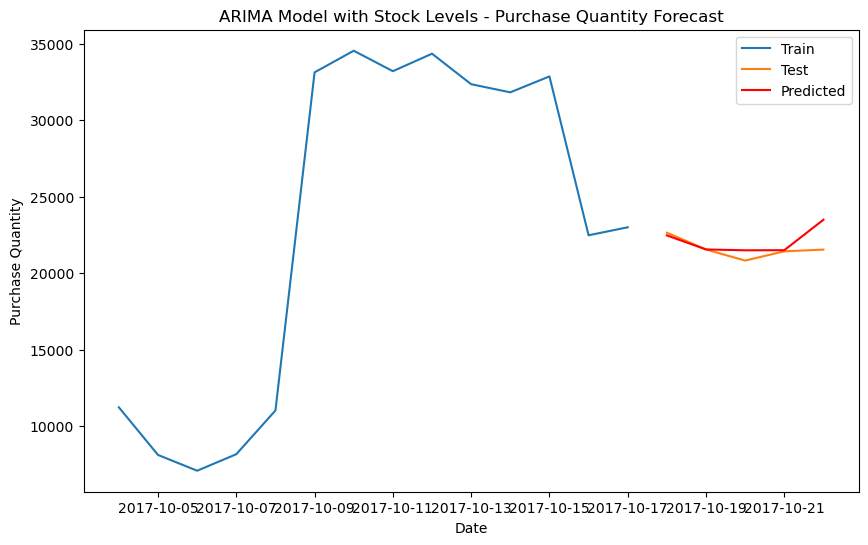

In [2372]:

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Sale_Quantity'], label='Train')
plt.plot(test_data.index, test_data['Sale_Quantity'], label='Test')
plt.plot(predictions.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Model with Stock Levels - Sale Quantity Forecast')
plt.xlabel('Date')
plt.ylabel('Purchase Quantity')
plt.legend()
plt.show()

In [2373]:
# It can be concluded that the model's performance improves significantly when inventory data is included.

# Question 4 some analysis on week 2

#### Trends with respect to PRODUCT_TYPE_NAME and Purchase quantity for understanding week 2 behaviour

In [2376]:

weekly_data_INDEX = merged_data.groupby(['Week', 'PRODUCT_TYPE_NAME']).agg(
    total_purchase_quantity=('Sale_Quantity', 'sum')
).reset_index()

pivot_table = weekly_data_INDEX.pivot_table(index='PRODUCT_TYPE_NAME', columns='Week', values='total_purchase_quantity', fill_value=0)
pivot_table

Week               Week_0   Week_1   Week_2
PRODUCT_TYPE_NAME                          
Bag                 432.0   1538.0    925.0
Ballerina            83.0     40.0     89.0
Bed linen          1749.0  10346.0   3684.0
Bed skirt             5.0     13.0      6.0
Bed spread           23.0     45.0     98.0
...                   ...      ...      ...
Tray                290.0   1266.0    378.0
Trousers           9206.0  27466.0  19576.0
Underwear bottom   3503.0  11277.0   5698.0
Vase                312.0   1454.0    651.0
Wedge                14.0     33.0     49.0

[83 rows x 3 columns]

In [2503]:
# percentage increase calculation

def calculate_increase(row):
    if row['Week_0'] == 0:  
        return None  
    return ((row["Week_1"] - row['Week_0']) / row['Week_0']) * 100 

def calculate_increase_1_2(row):
    if row['Week_1'] == 0:  
        return None  
    return ((row["Week_2"] - row['Week_1']) / row['Week_1']) * 100 

pivot_table['increase_week0_week1'] = pivot_table.apply(calculate_increase, axis=1)
pivot_table['increase_week1_week2'] = pivot_table.apply(calculate_increase_1_2, axis=1)


#pivot_table.sort_values("increase_week0_week1",ascending = False)
pivot_table.sort_values("increase_week1_week2",ascending = False)


Week                  Week_0  Week_1  Week_2  increase_week0_week1  \
PRODUCT_TYPE_NAME                                                    
Cosmetic accessories    39.0    10.0    66.0            -74.358974   
Toys                     9.0     9.0    30.0              0.000000   
Ballerina               83.0    40.0    89.0            -51.807229   
Bed spread              23.0    45.0    98.0             95.652174   
Bikini                 242.0   300.0   601.0             23.966942   
...                      ...     ...     ...                   ...   
Strap top              180.0  1320.0   192.0            633.333333   
Hair/alice band         10.0    59.0     2.0            490.000000   
Polo shirt              35.0   119.0     0.0            240.000000   
Napkin                  43.0    48.0     0.0             11.627907   
Robe                    10.0     0.0    25.0           -100.000000   

Week                  increase_week1_week2  
PRODUCT_TYPE_NAME                           
Cosmetic accessories            560.000000  
Toys                            233.333333  
Ballerina                       122.500000  
Bed spread                      117.777778  
Bikini                          100.333333  
...                                    ...  
Strap top                       -85.454545  
Hair/alice band                 -96.610169  
Polo shirt                     -100.000000  
Napkin                         -100.000000  
Robe                                   NaN  

[83 rows x 5 columns]